In [12]:
import logging

from utils import logging as lg


lg.set_logging(logging.ERROR)

In [13]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cmocean


tf.logging.set_verbosity(tf.logging.ERROR)

import math

from utils import data_provider
from utils import experiment_artifact
from notebook_utils import plot
from model import s2_network, s3_network, provider as model_provider

from heatmap_tutorial import modules, utils

plot.setup()


# Data Preparation

In [4]:
X_train, Y_train = data_provider.get_mnist('train', dir_path='../data/mnist')
X_test, Y_test = data_provider.get_mnist('test', dir_path='../data/mnist')

In [5]:
X_train_2d = np.copy(X_train.reshape((-1,28,28)))
X_test_2d = np.copy(X_test.reshape((-1,28,28)))

In [6]:
def plot_heatmap(data_idx, s2_models,  s3_models, colorbar=False, suptitle='', highlight_plots=[]):
    global count
    
    no_cols = np.max([len(s2_models), len(s3_models)]) + 1
    plt.figure(figsize=(5*no_cols,12))
    plt.suptitle(suptitle)

    x = X_test_2d[data_idx,:,:].reshape(1,28,28)

    y_target = np.argmax(Y_test[data_idx])

    plt.subplot(2,no_cols,1)
    plt.title('Data Label %d' % y_target)
    plt.imshow(x.reshape(28,28))
    if colorbar:
        plt.colorbar()

    count = 2
    def plot_models(models):
        global count
        for f in models:
            ax = plt.subplot(2,no_cols,count)
            model = model_provider.load(f)

            pred_label, heatmap = model.lwr(x, debug=False)
            plt.title('%s\n%s\n%s\n(keep_prob=%.2f acc=%.4f)\n no. variables %d | pred %d' %
                      (model._.architecture_name, model._.experiment_name, model._.architecture, 
                       model._.keep_prob, model._.accuracy, 
                       model.dag.no_variables(), pred_label[0]))
            plt.imshow(heatmap[0,:,:], cmap='Reds')
            
            if count in highlight_plots:
                for axis in ['top','bottom','left','right']:
                    ax.spines[axis].set_linewidth(5)

            if colorbar:
                plt.colorbar()
            count = count + 1
            if count-1 % no_cols == 0:
                count + 1 # skip 1st col
            
    plot_models(s2_models)
    count = count + 1 # skip 1st col for 2nd row
    plot_models(s3_models)
    
    plt.show() 

# Network
## S2 network ( 1st architecture )
![](https://i.imgur.com/BNLuFy2.png)
## S3 network ( 2nd architecture )
![](https://i.imgur.com/zMBa1pi.png)

# Sprint 4th: LWR

## Seq Legth : 7 ( 4 cols feed )

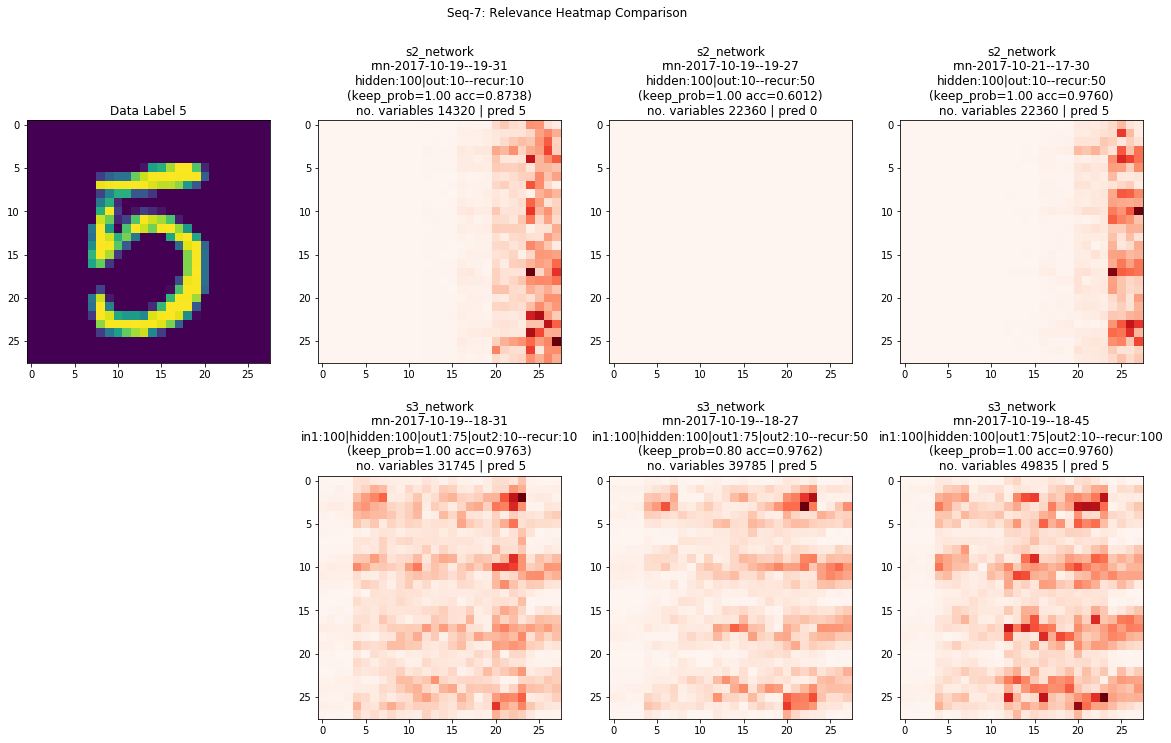

In [49]:
s2_seq_7_models = [
     '../experiment-results/sprint-4/rnn-2017-10-19--19-31',
     '../experiment-results/sprint-4/rnn-2017-10-19--19-27',
     '../experiment-results/sprint-5/rnn-2017-10-21--17-30',
]


s3_seq_7_models = [
    '../experiment-results/sprint-4/rnn-2017-10-19--18-31',
    '../experiment-results/sprint-4/rnn-2017-10-19--18-27',
    '../experiment-results/sprint-4/rnn-2017-10-19--18-45',
]

plot_heatmap(4420, s2_seq_7_models, s3_seq_7_models, suptitle='Seq-7: Relevance Heatmap Comparison')

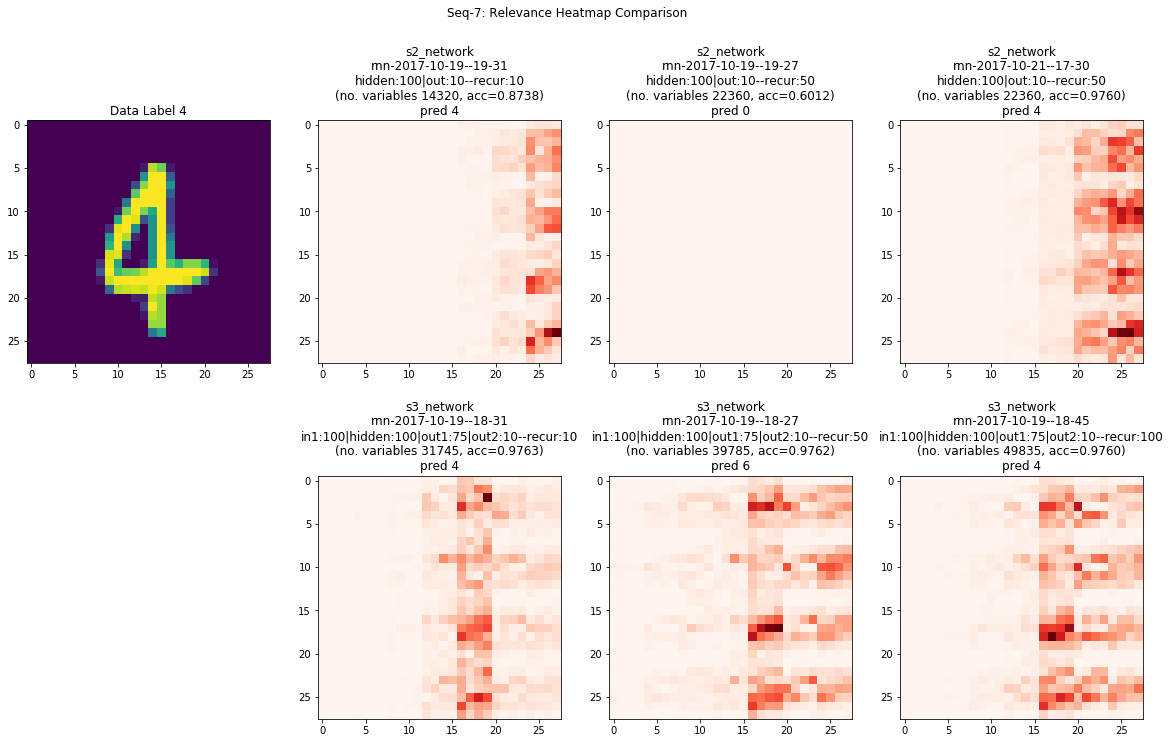

In [8]:
plot_heatmap(4751, s2_seq_7_models, s3_seq_7_models, suptitle='Seq-7: Relevance Heatmap Comparison')

## Seq Length : 14 ( 2 column )

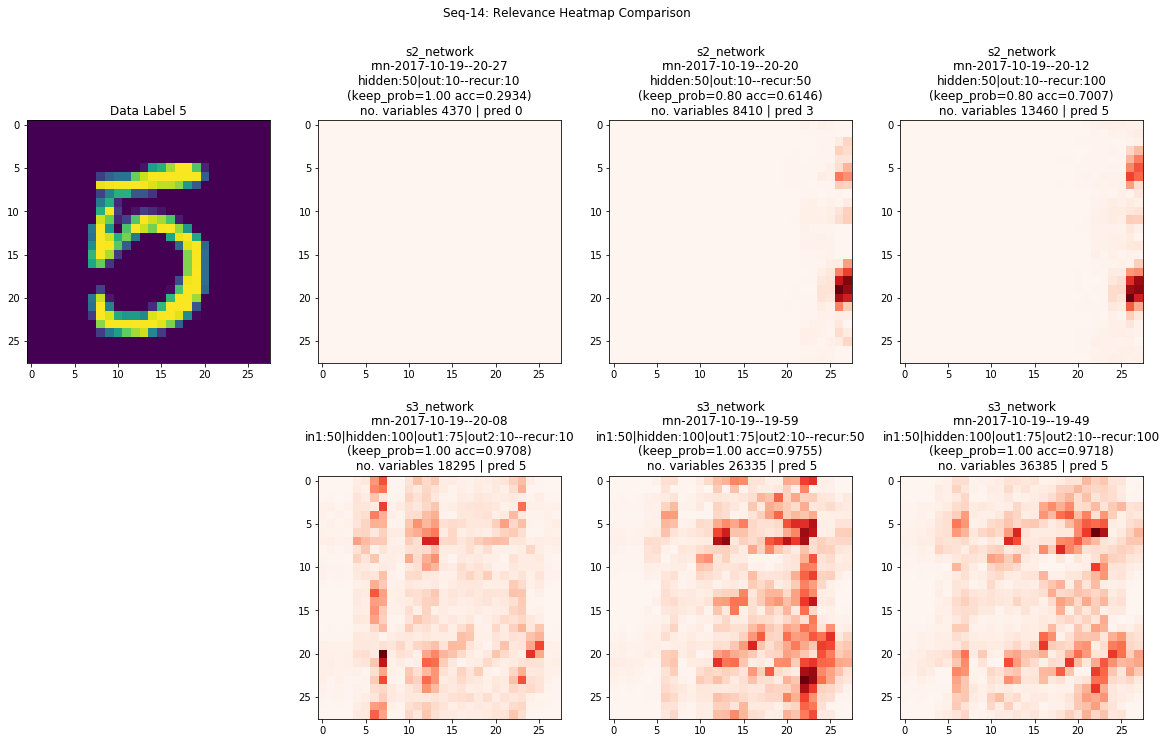

In [50]:
s2_seq_14_models = [
    '../experiment-results/sprint-4/rnn-2017-10-19--20-27',
    '../experiment-results/sprint-4/rnn-2017-10-19--20-20',
    '../experiment-results/sprint-4/rnn-2017-10-19--20-12',
]

s3_seq_14_models = [
    '../experiment-results/sprint-4/rnn-2017-10-19--20-08',
    '../experiment-results/sprint-4/rnn-2017-10-19--19-59',
    '../experiment-results/sprint-4/rnn-2017-10-19--19-49',
]

plot_heatmap(4420, s2_seq_14_models, s3_seq_14_models, suptitle='Seq-14: Relevance Heatmap Comparison')

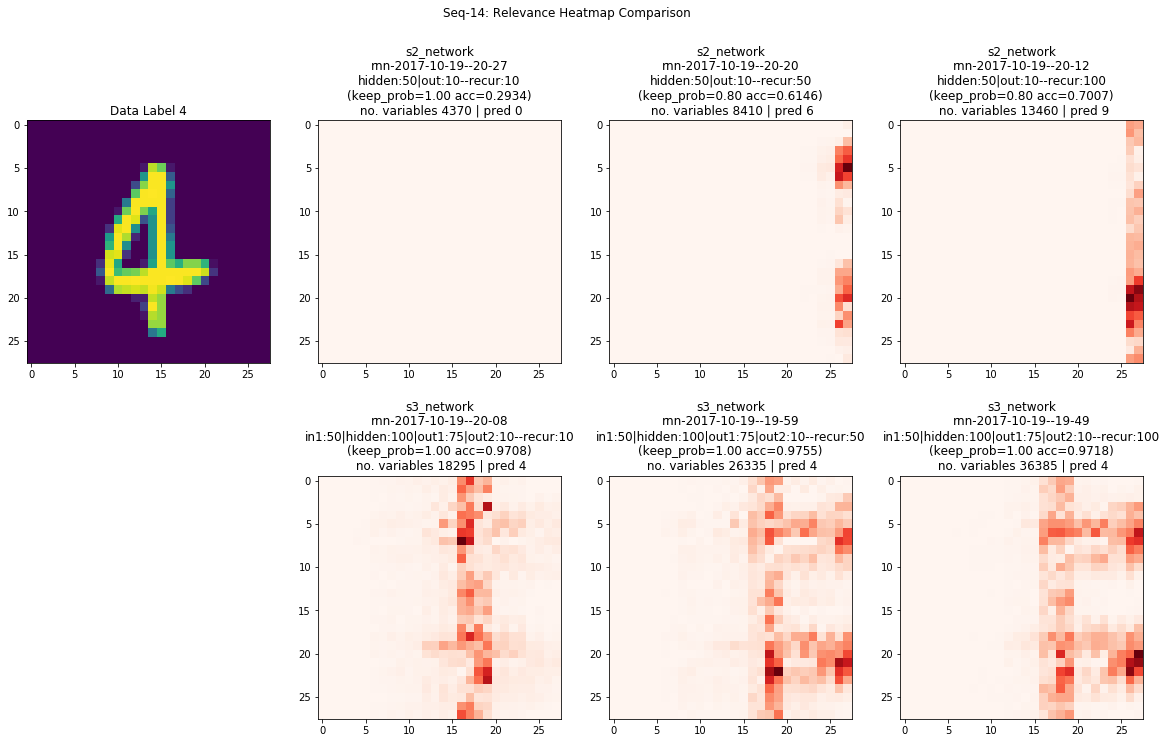

In [51]:
plot_heatmap(4751, s2_seq_14_models, s3_seq_14_models, suptitle='Seq-14: Relevance Heatmap Comparison')

## Seq length : 28 ( 1 col at a time )

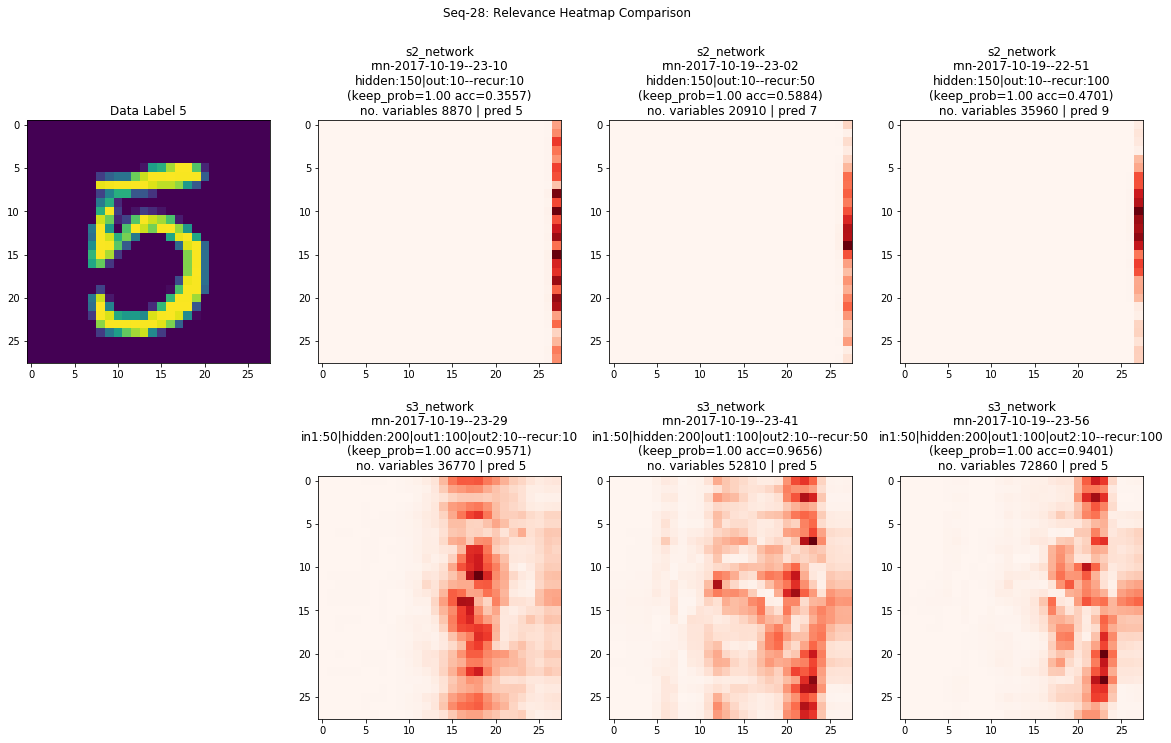

In [52]:
s2_seq_28_models = [
    '../experiment-results/sprint-4/rnn-2017-10-19--23-10',
    '../experiment-results/sprint-4/rnn-2017-10-19--23-02',
    '../experiment-results/sprint-4/rnn-2017-10-19--22-51',
]

s3_seq_28_models = [
    '../experiment-results/sprint-4/rnn-2017-10-19--23-29',
    '../experiment-results/sprint-4/rnn-2017-10-19--23-41',
    '../experiment-results/sprint-4/rnn-2017-10-19--23-56',
]

plot_heatmap(4420, s2_seq_28_models, s3_seq_28_models, suptitle='Seq-28: Relevance Heatmap Comparison')

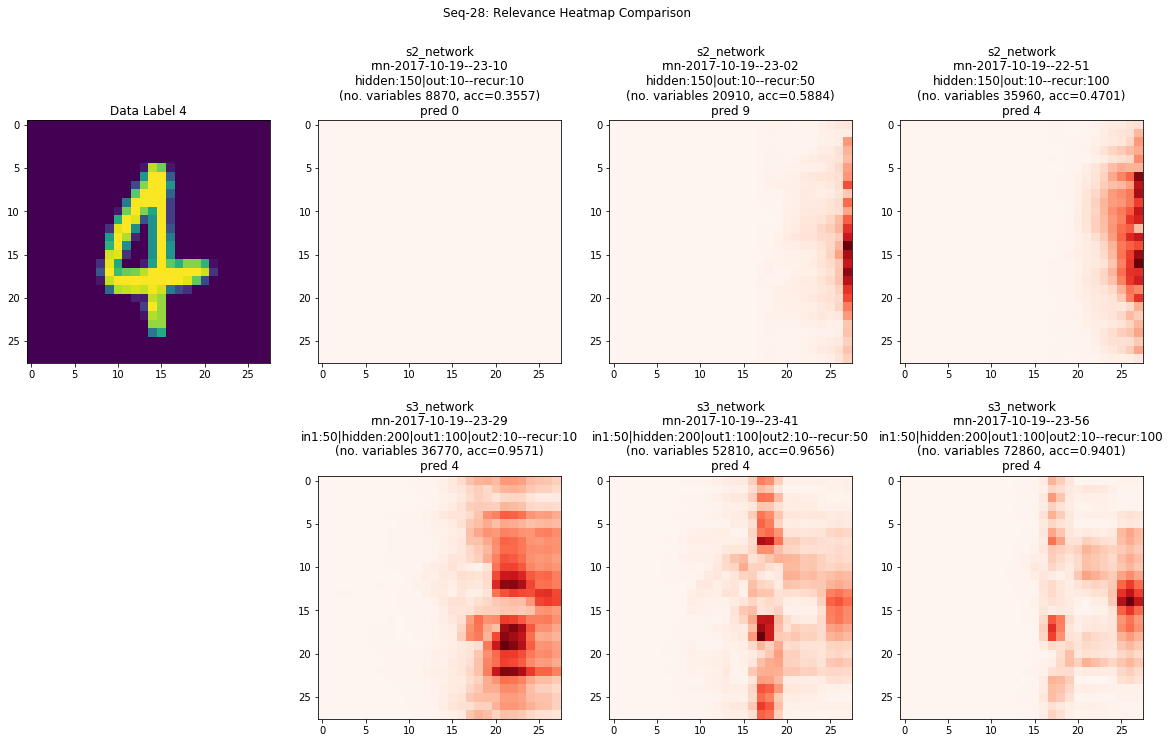

In [12]:
plot_heatmap(4751, s2_seq_28_models, s3_seq_28_models, suptitle='Seq-28: Relevance Heatmap Comparison')

# Sprint 5th

## Grid Search Results
I've used grid search to find good models of the two networks using the setting below

**S2 Network**'s hypeerparameter setting
 - hidden_units: [400, 800, 1000]
 - recurrent_units: [50, 100, 200]
 - keep_prob: [0.5, 0.8, 1]

**S3 Network**'s hypeerparameter setting
 - hidden_units: [200, 400]
 - recurrent_units: [50, 100]
 - in1_units: [400, 800, 1000]
 - out1_units: [200, 400]
 - keep_prob: [0.5, 1]


So far, the best models that I have got are:

| network  | name | architecture | test accuracy | no. variables |
|---       | -----|    ------ | --------- |
| s2_network | **rnn-2017-10-25--03-06** | hidden:1000&#124;out:10--recur:100 | 0.9816 | 323110 |
| s2_network | rnn-2017-10-25--01-59 | hidden:1000&#124;out:10--recur:200 | 0.9813 | 523210  |
| s2_network | rnn-2017-10-24--23-21 | hidden:400&#124;out:10--recur:50 | 0.9808 | 89260 |



| network  | name | architecture | test accuracy | no. variables |
|---       | -----|    ------ | --------- |
| s3_network | rnn-2017-10-22--14-41 | in1:400&#124;hidden:400&#124;out1:200&#124;out2:10--recur:100 | 0.9864 | 367910 |
| s3_network | rnn-2017-10-22--00-50 | in1:800&#124;hidden:400&#124;out1:200&#124;out2:10--recur:50  | 0.9849 | 533060 |
| ... |
| s3_network | **rnn-2017-10-21--19-18** | in1:800&#124;hidden:200&#124;out1:200&#124;out2:10--recur:50 |0.9827| 312860 |


**Interpretation of columns**
- **Architecture** : for example, *hidden:100|out:10--recur:50* means 
        - 100 neurons at hidden layer
        - 10 neurons at output layer
        - 50 neurons at recurrent layer
- **No. variables** : no. of weights and biases used in the network


Personally, I think models with *acc > 0.98* are good enough. However, I feel that it might not sound to do a comparison between the best of the two architectures as the number of variables in the networks are quite different (~40k).

So, my idea is to compare between the best of **S2Network**, *rnn-2017-10-25--03-06* and one of **S3Network** that has almost the same number of variables. In this case, it's **rnn-2017-10-21--19-18**. Results from these two networks are highlighted with trick borders in the following section.

## Relevance heatmap from the best models

In [8]:
s5_seq_7_models_row1 = [
    '../experiment-results/sprint-5/rnn-2017-10-25--03-06',
    '../experiment-results/sprint-5/rnn-2017-10-25--01-59',
    '../experiment-results/sprint-5/rnn-2017-10-24--23-21',
]

s5_seq_7_models_row2 = [
    '../experiment-results/sprint-5/rnn-2017-10-22--14-41',
    '../experiment-results/sprint-5/rnn-2017-10-22--00-50',
    '../experiment-results/sprint-5/rnn-2017-10-21--19-18',
]

INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-25--03-06/model.ckpt


2017-11-02 21:24:24,226 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-25--03-06/model.ckpt


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-25--01-59/model.ckpt


2017-11-02 21:24:26,818 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-25--01-59/model.ckpt


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-24--23-21/model.ckpt


2017-11-02 21:24:29,715 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-24--23-21/model.ckpt


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-22--14-41/model.ckpt


2017-11-02 21:24:32,870 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-22--14-41/model.ckpt


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-22--00-50/model.ckpt


2017-11-02 21:24:36,608 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-22--00-50/model.ckpt


INFO:tensorflow:Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-21--19-18/model.ckpt


2017-11-02 21:24:39,822 | INFO : tf_logging.py(info 82) - Restoring parameters from ../experiment-results/sprint-5/rnn-2017-10-21--19-18/model.ckpt


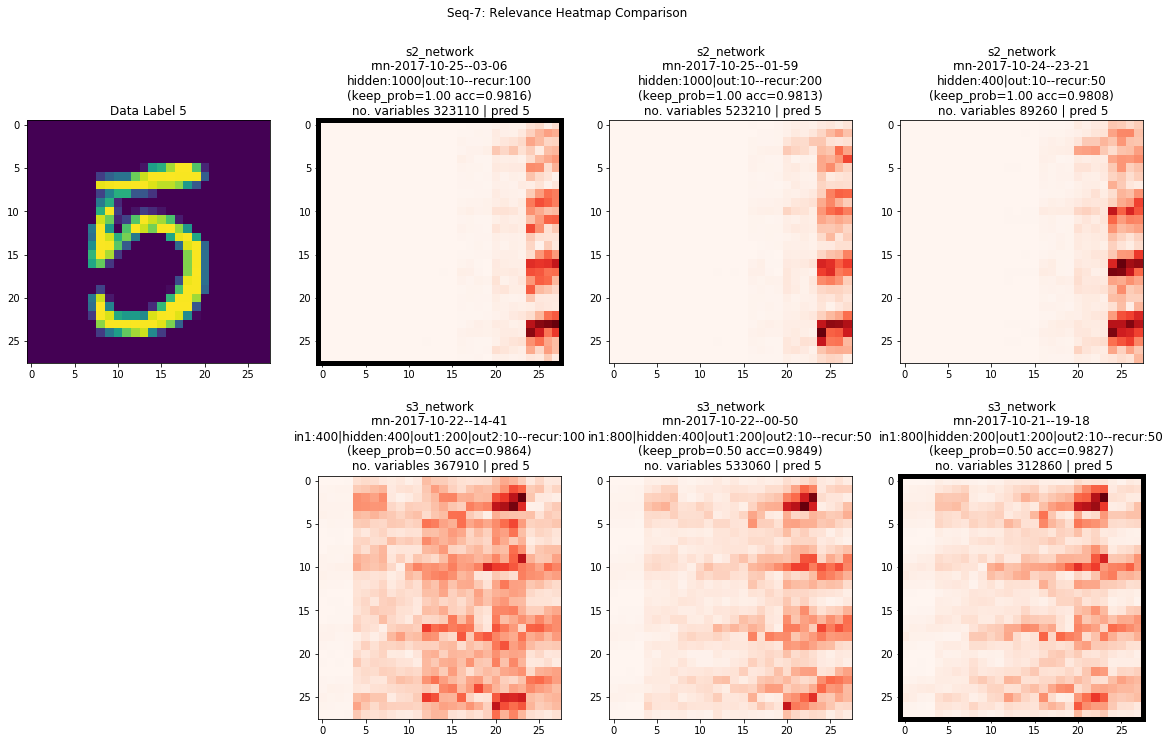

In [9]:
def plot_s5_experiments(data_idx):
    highlight_plots = [2,8]
    plot_heatmap(data_idx, s5_seq_7_models_row1, s5_seq_7_models_row2,
                 suptitle='Seq-7: Relevance Heatmap Comparison', highlight_plots=highlight_plots)
    
plot_s5_experiments(4420)

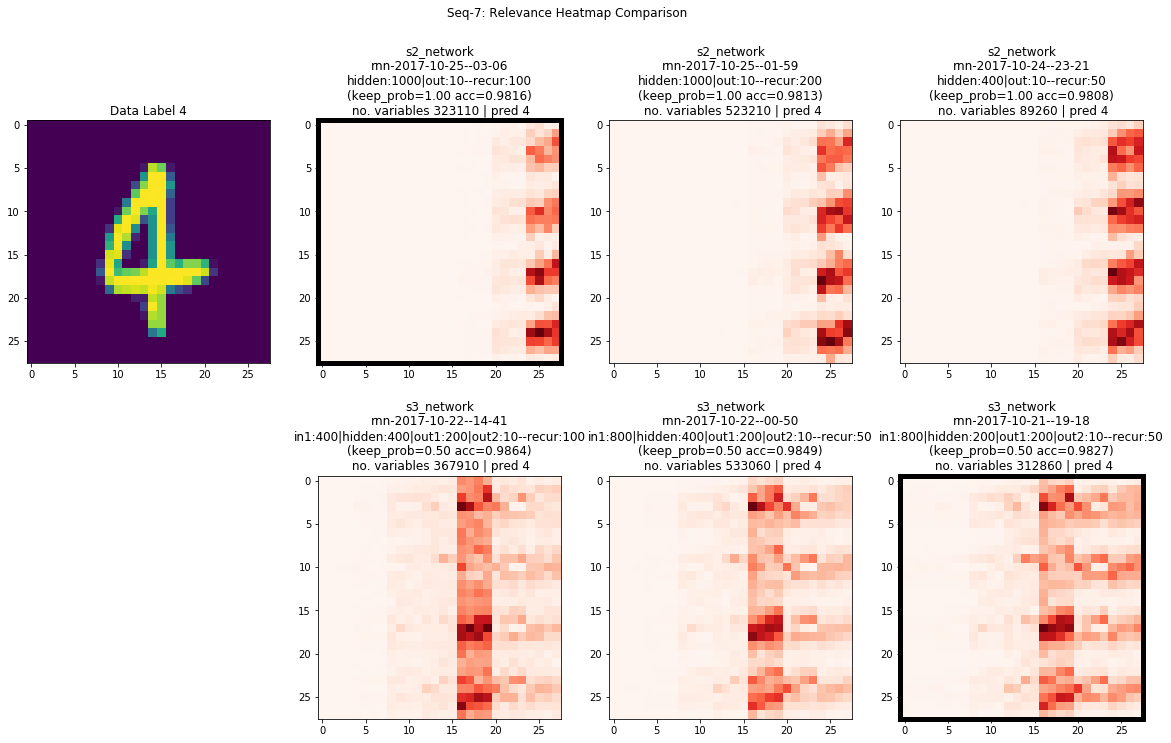

In [54]:
plot_s5_experiments(4751)

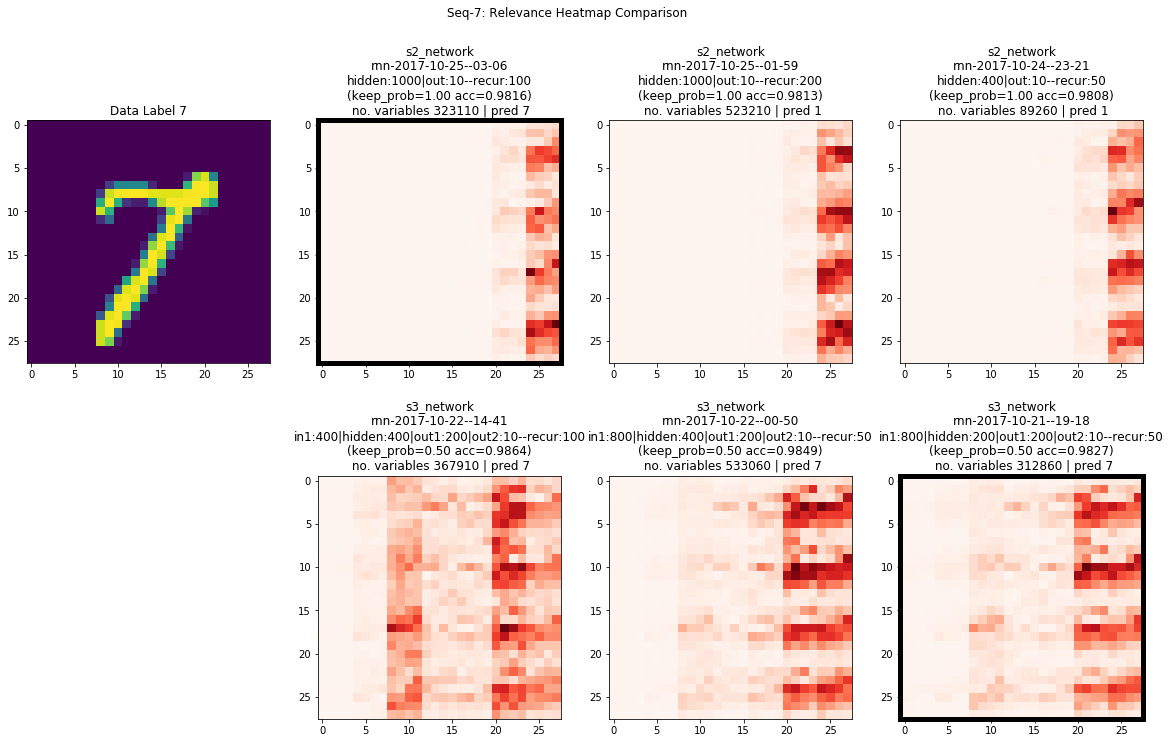

In [55]:
plot_s5_experiments(4900)

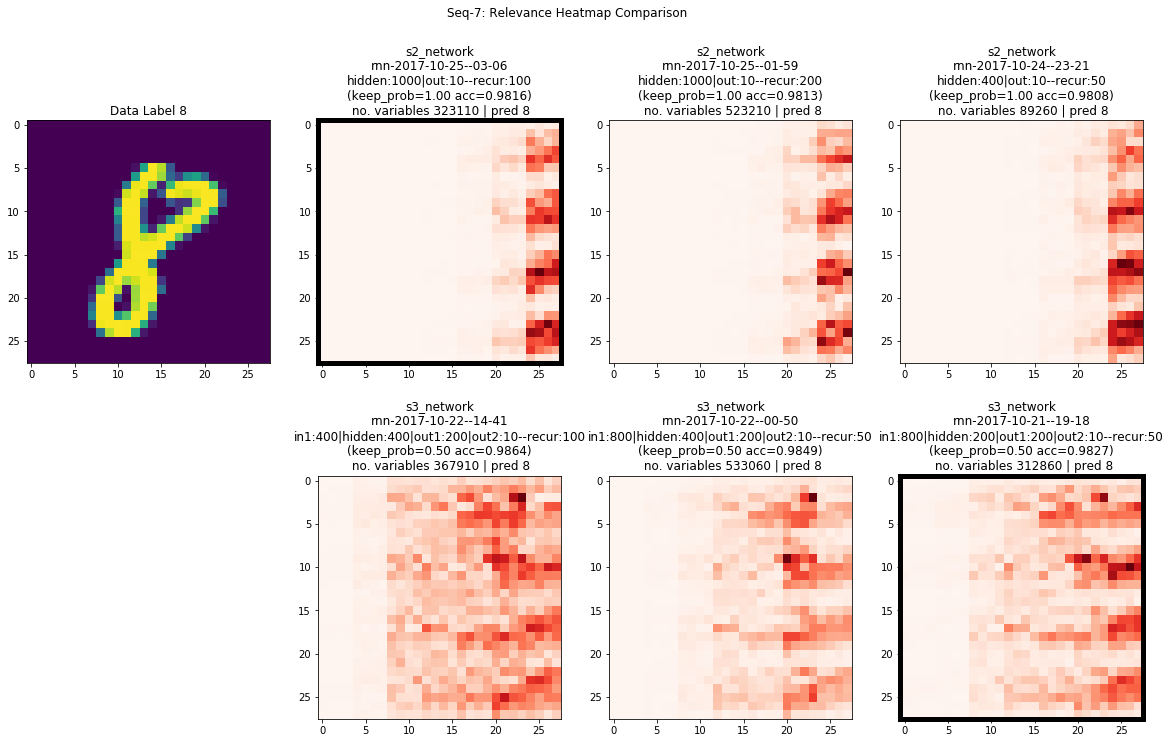

In [56]:
plot_s5_experiments(8894)

## Visualize layers

### S2 Network

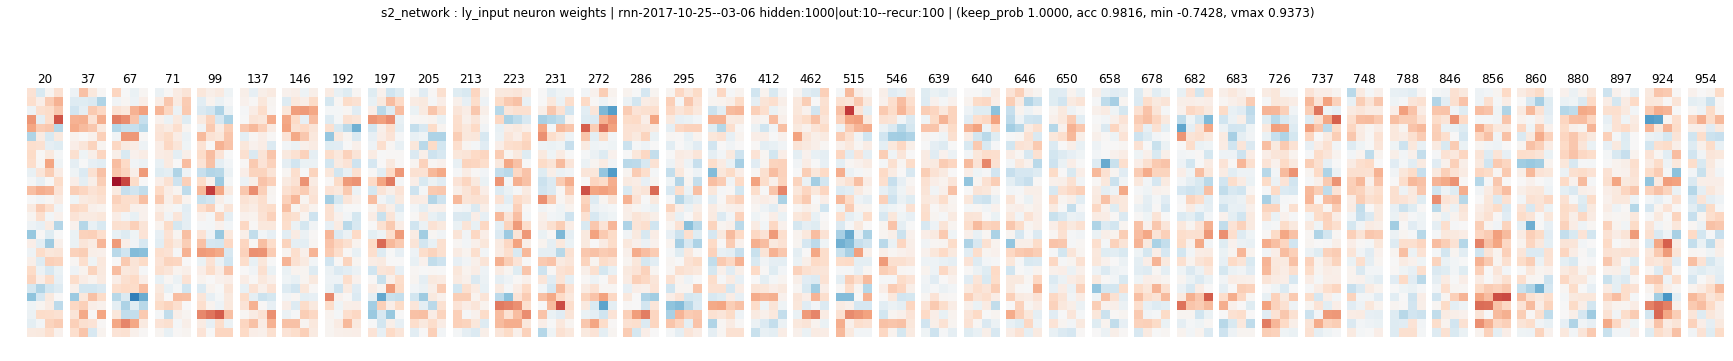

In [152]:
def plot_layer(model, layer_name, col_selector=-1, seed = 1, nrows=1, ncols=40, img_shape=(28,4),
               no_plots=40,row_size=6, col_size=0.76, normalized=True, lazy_show=False, cmap='RdBu'):

    model_obj = model_provider.load(model)

    with model_obj.get_session() as sess:
        w = getattr(model_obj.dag, layer_name).W.eval(session=sess)
        
    w_selected = w[:col_selector, :].T
    
    vmin = np.min(w_selected)
    vmax = np.max(w_selected)
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(col_size*ncols,row_size*nrows))
    np.random.seed(2)
    indices = sorted(np.random.choice(w_selected.shape[0], size=no_plots, replace=False))
    for i, ax in zip(indices,axes.flat):

        if normalized:
            im = ax.imshow(w_selected[i,:].reshape(*img_shape), cmap=cmap, vmin=vmin, vmax=vmax)
        else:
            im = ax.imshow(w_selected[i,:].reshape(*img_shape), cmap=cmap)
        ax.axis('off')

        ax.set_title(i)

    plt.suptitle('%s : %s neuron weights | %s %s | (keep_prob %.4f, acc %.4f, min %.4f, vmax %.4f)' % (
                model_obj._.architecture_name,
                layer_name,
                model_obj._.experiment_name,
                model_obj._.architecture,
                model_obj._.keep_prob,
                model_obj._.accuracy,
                vmin,
                vmax
    ))


    if not lazy_show:
        plt.show()
plot_layer(s5_seq_7_models_row1[0], 'ly_input', col_selector=28*4)    

#### 1st network

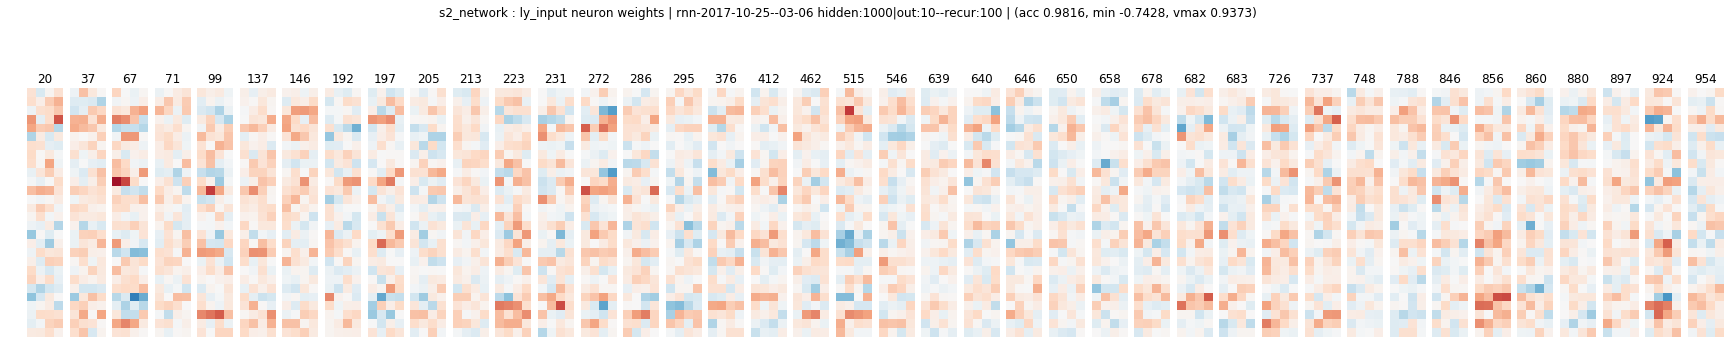

In [36]:
plot_layer(s5_seq_7_models_row1[0], 'ly_input', col_selector=28*4)

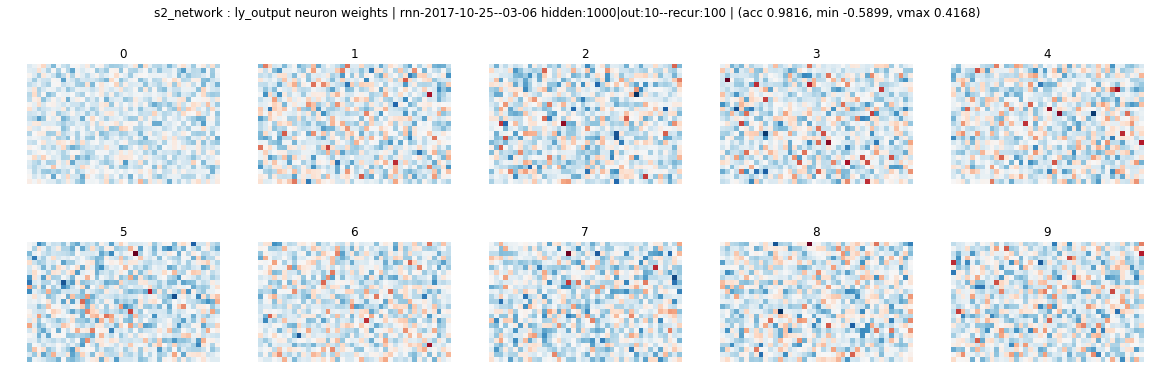

In [37]:
plot_layer(s5_seq_7_models_row1[0], 'ly_output', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

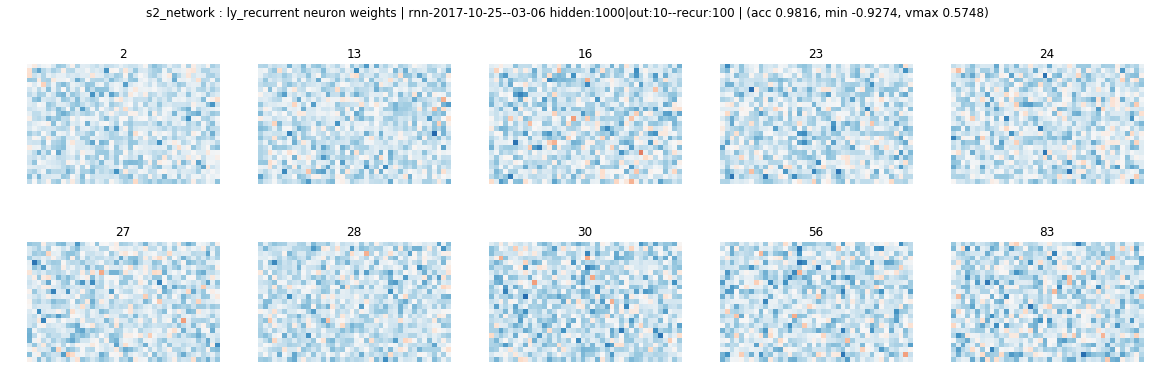

In [38]:
plot_layer(s5_seq_7_models_row1[0], 'ly_recurrent', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

#### 2nd network

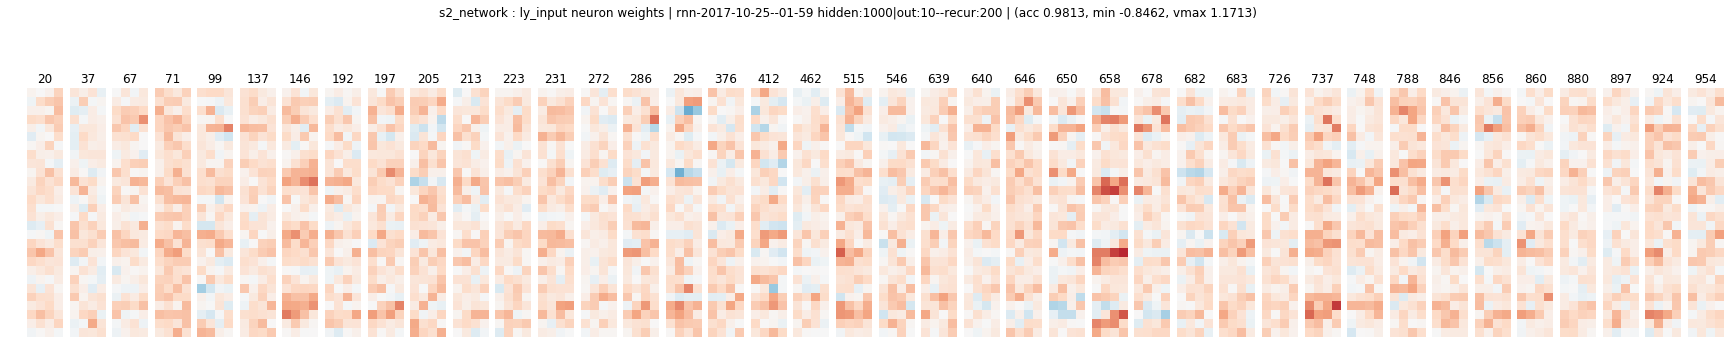

In [39]:
plot_layer(s5_seq_7_models_row1[1], 'ly_input', col_selector=28*4)

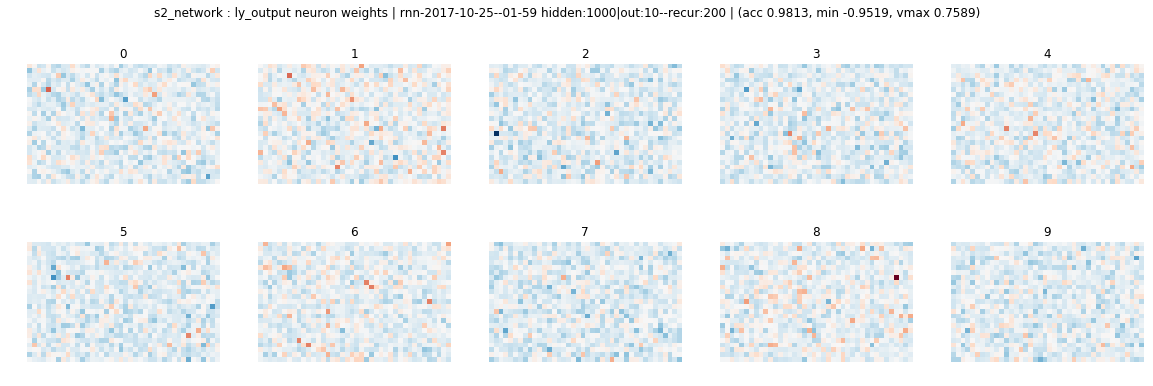

In [40]:
plot_layer(s5_seq_7_models_row1[1], 'ly_output', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

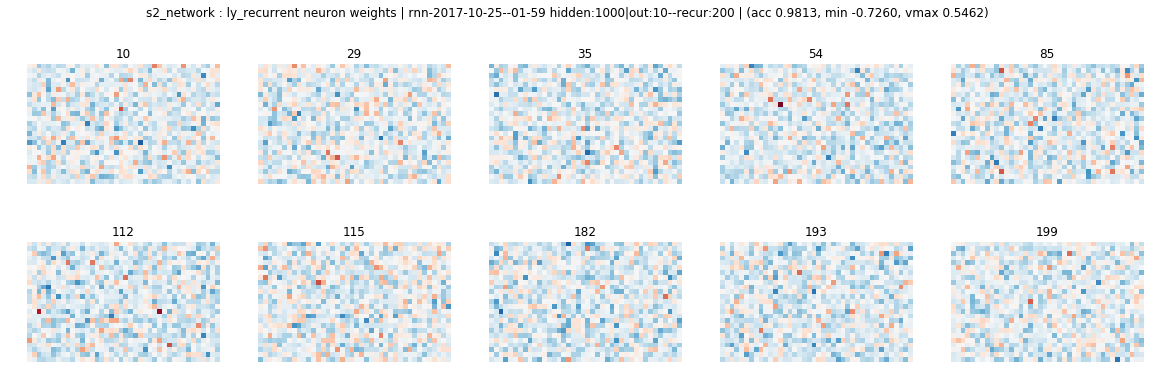

In [41]:
plot_layer(s5_seq_7_models_row1[1], 'ly_recurrent', col_selector=None, nrows=2, ncols=5, img_shape=(25,40), no_plots=10,
           row_size=3, col_size=4)

#### 3rd network

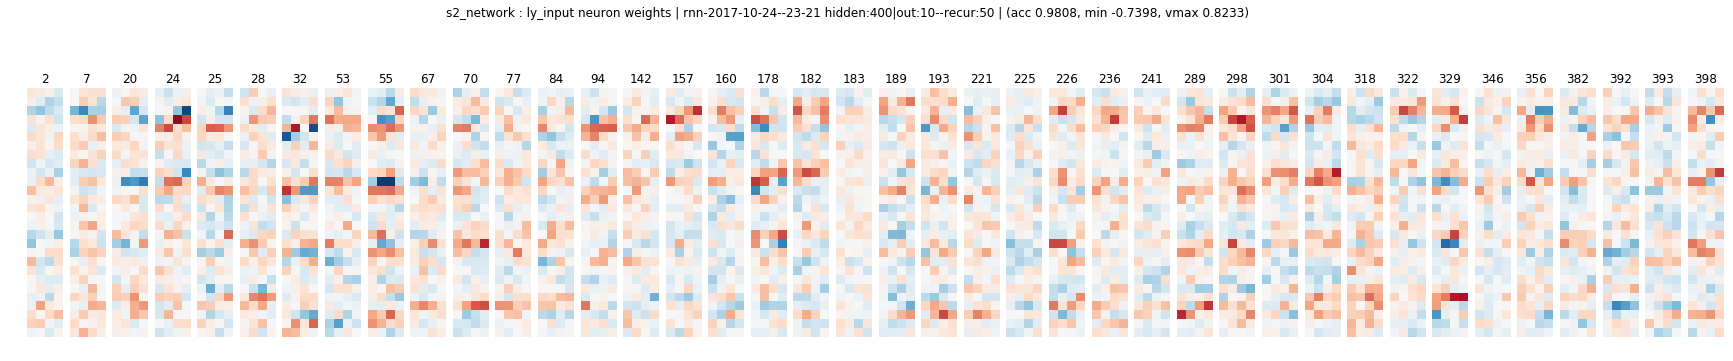

In [42]:
plot_layer(s5_seq_7_models_row1[2], 'ly_input', col_selector=28*4)

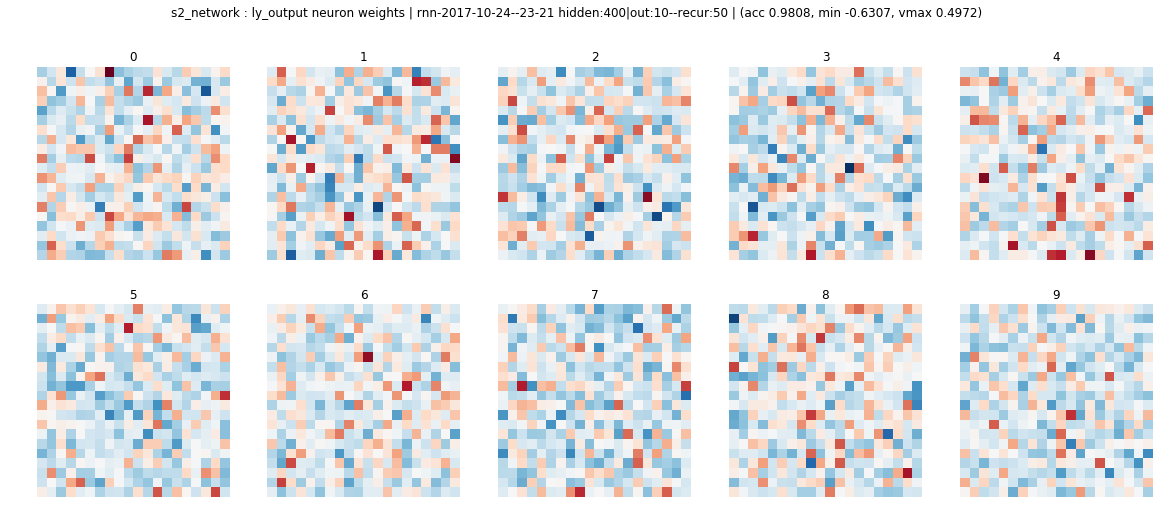

In [43]:
plot_layer(s5_seq_7_models_row1[2], 'ly_output', col_selector=None, nrows=2, ncols=5, img_shape=(20,20), no_plots=10,
           row_size=4, col_size=4)

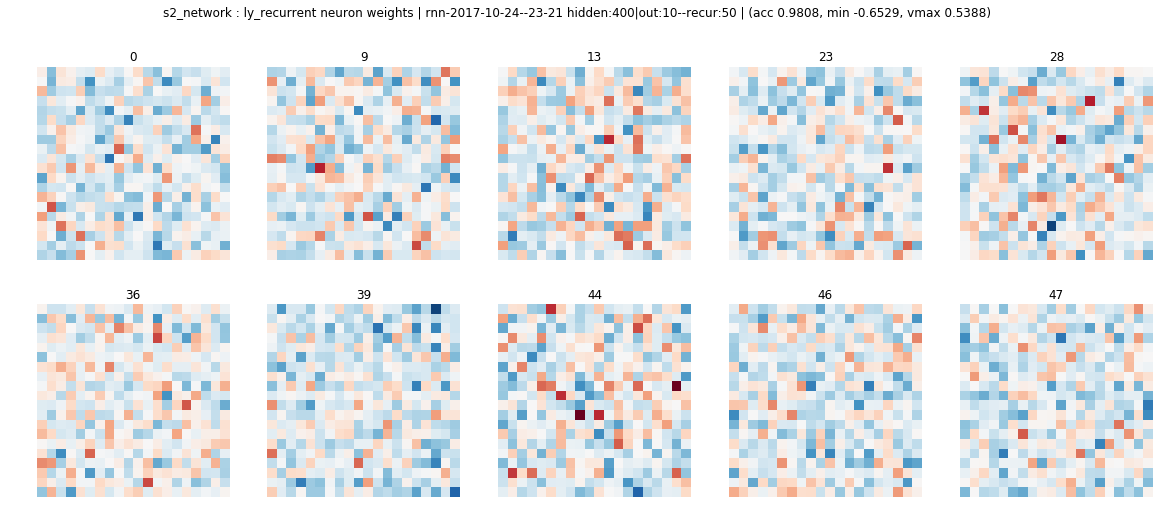

In [44]:
plot_layer(s5_seq_7_models_row1[2], 'ly_recurrent', col_selector=None, nrows=2, ncols=5, img_shape=(20,20), no_plots=10,
           row_size=4, col_size=4)

### S3 Network

#### 1st network

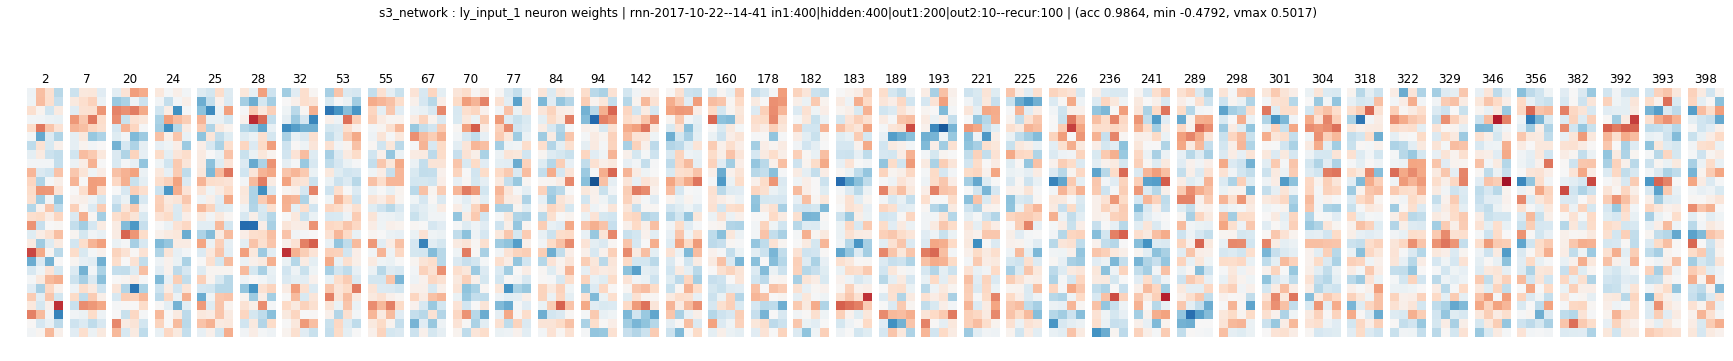

In [45]:
plot_layer(s5_seq_7_models_row2[0], 'ly_input_1', col_selector=None)

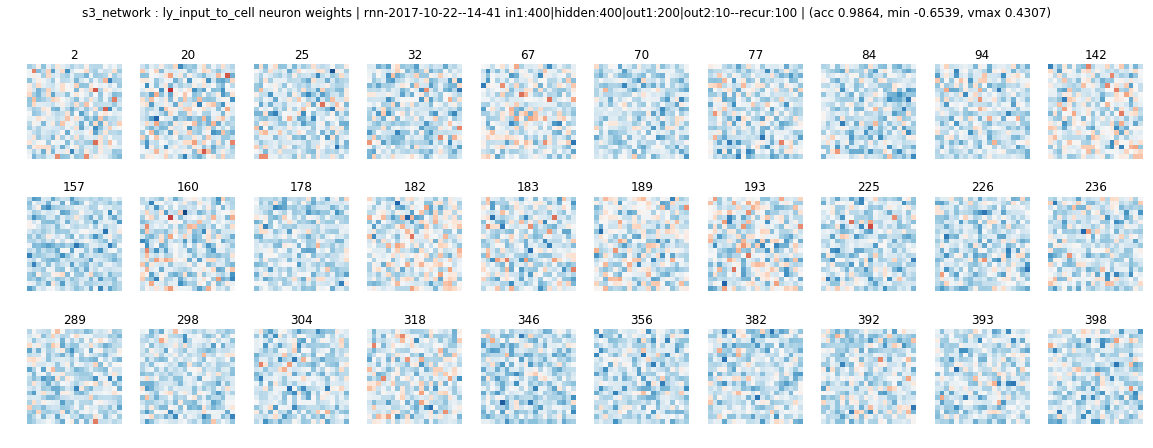

In [46]:
plot_layer(s5_seq_7_models_row2[0], 'ly_input_to_cell', col_selector=400, img_shape=(20,20), no_plots=30, ncols=10, nrows=3,
           col_size=2, row_size=2.3)

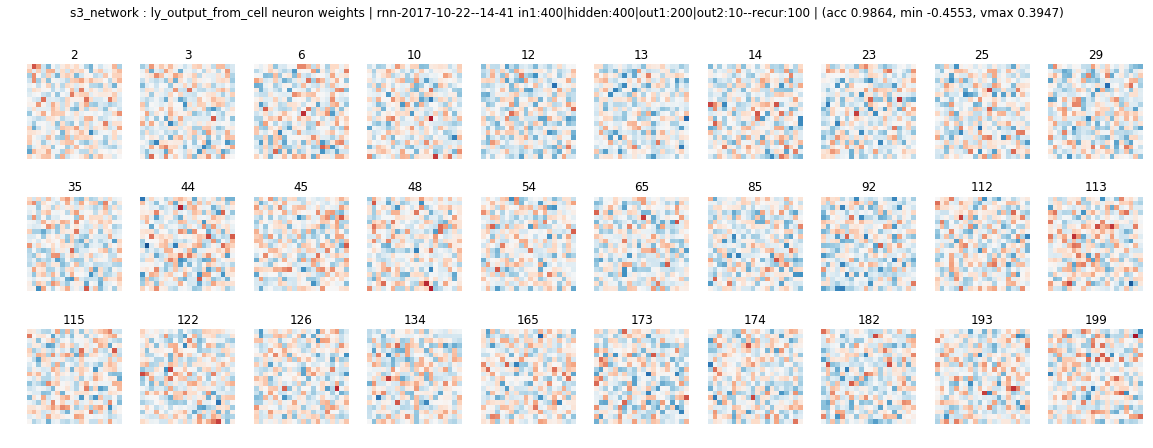

In [47]:
plot_layer(s5_seq_7_models_row2[0], 'ly_output_from_cell', col_selector=None, img_shape=(20,20), no_plots=30, ncols=10, nrows=3,
           col_size=2, row_size=2.3)

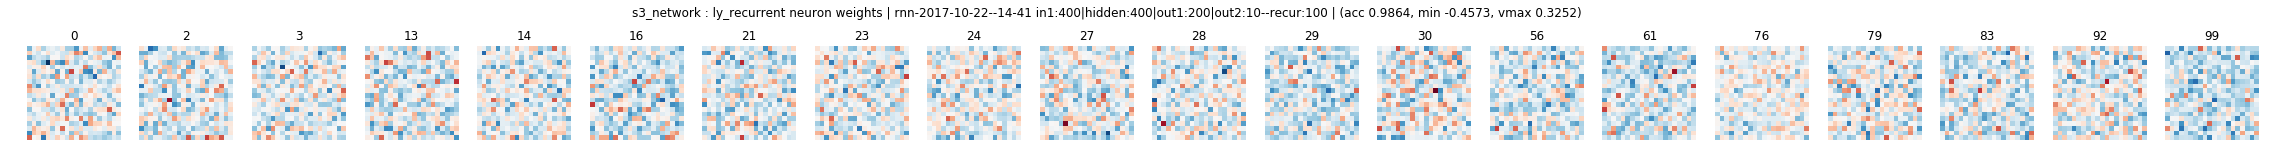

In [48]:
plot_layer(s5_seq_7_models_row2[0], 'ly_recurrent', col_selector=None, img_shape=(20,20), no_plots=20, ncols=20, nrows=1,
           col_size=2, row_size=2.5)

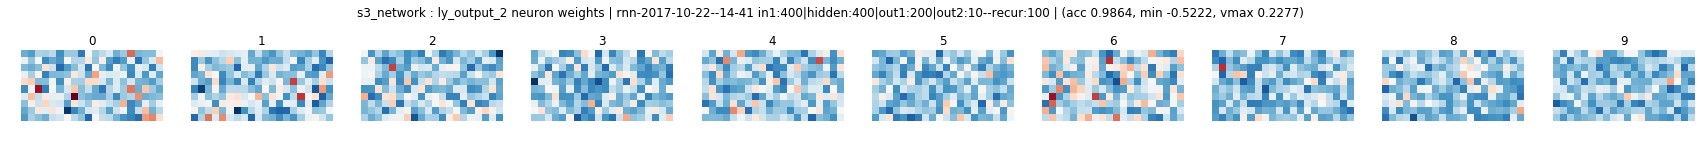

In [49]:
plot_layer(s5_seq_7_models_row2[0], 'ly_output_2', col_selector=None, img_shape=(10,20), no_plots=10, ncols=10, nrows=1,
           col_size=3, row_size=2.3)

#### 2nd network

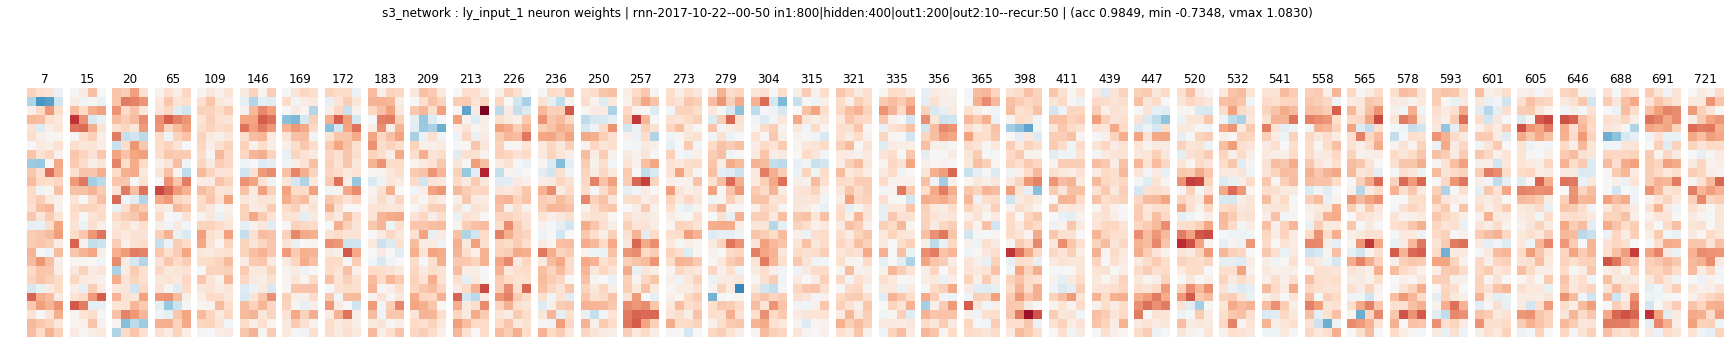

In [50]:
plot_layer(s5_seq_7_models_row2[1], 'ly_input_1', col_selector=None)

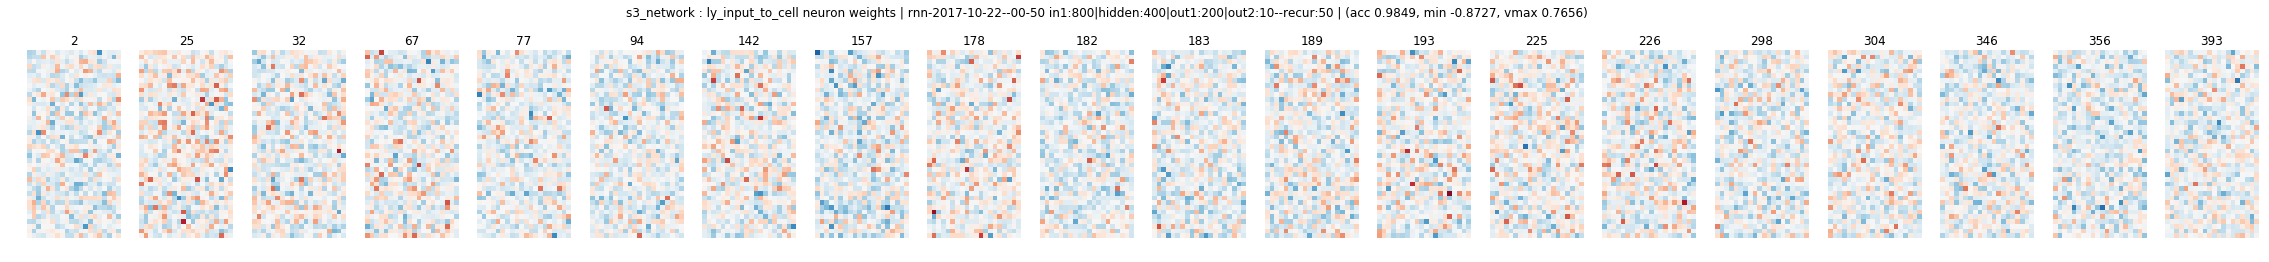

In [51]:
plot_layer(s5_seq_7_models_row2[1], 'ly_input_to_cell', col_selector=800, img_shape=(40,20), no_plots=20, ncols=20, nrows=1,
           col_size=2, row_size=4)

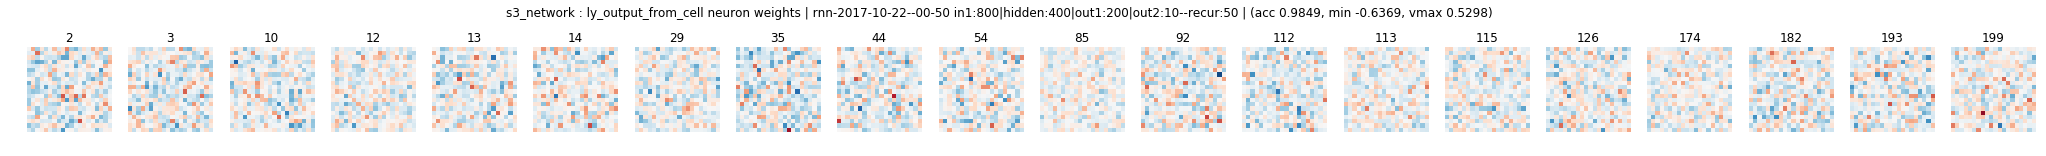

In [52]:
plot_layer(s5_seq_7_models_row2[1], 'ly_output_from_cell', col_selector=None, img_shape=(20,20), no_plots=20, ncols=20, nrows=1,
           col_size=1.8, row_size=2.4)

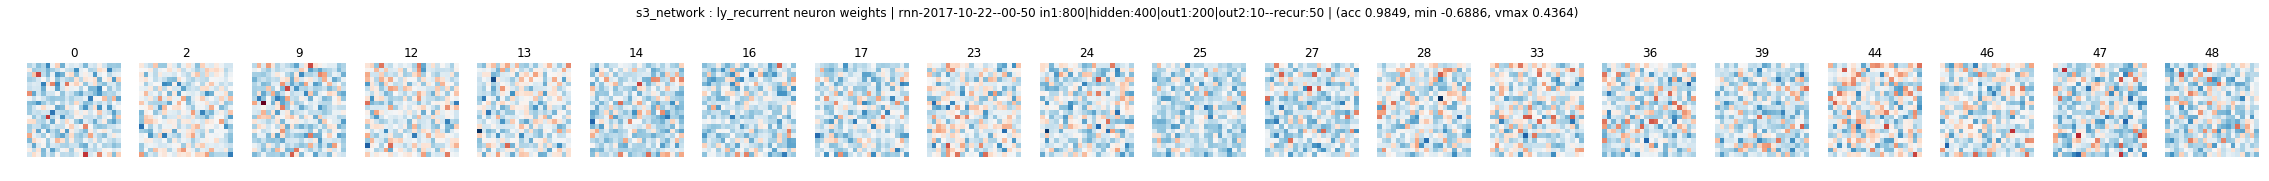

In [53]:
plot_layer(s5_seq_7_models_row2[1], 'ly_recurrent', col_selector=None, img_shape=(20,20), no_plots=20, ncols=20, nrows=1,
           col_size=2, row_size=3)

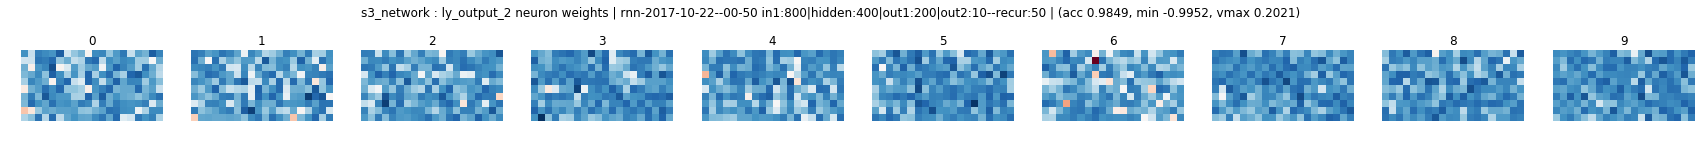

In [54]:
plot_layer(s5_seq_7_models_row2[1], 'ly_output_2', col_selector=None, img_shape=(10,20), no_plots=10, ncols=10, nrows=1,
           col_size=3, row_size=2.3)

#### 3rd network

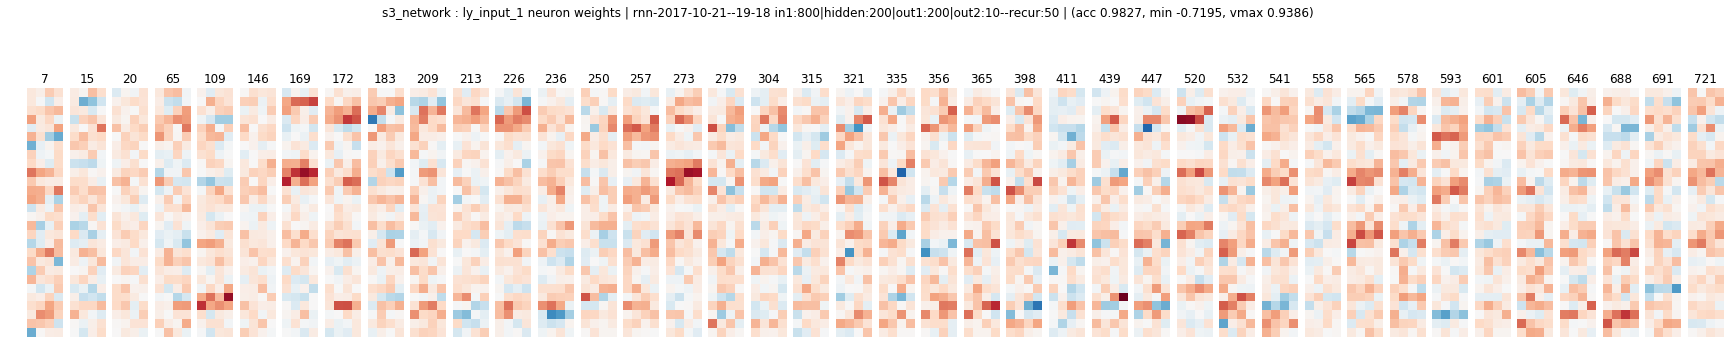

In [55]:
plot_layer(s5_seq_7_models_row2[2], 'ly_input_1', col_selector=None)

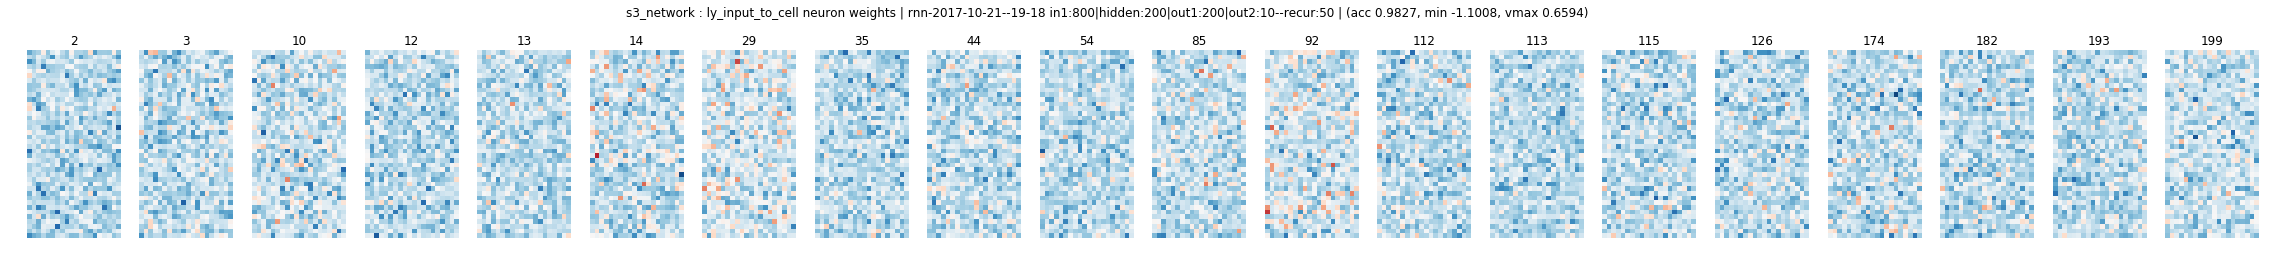

In [56]:
plot_layer(s5_seq_7_models_row2[2], 'ly_input_to_cell', col_selector=800, img_shape=(40,20), no_plots=20, ncols=20, nrows=1,
           col_size=2, row_size=4)

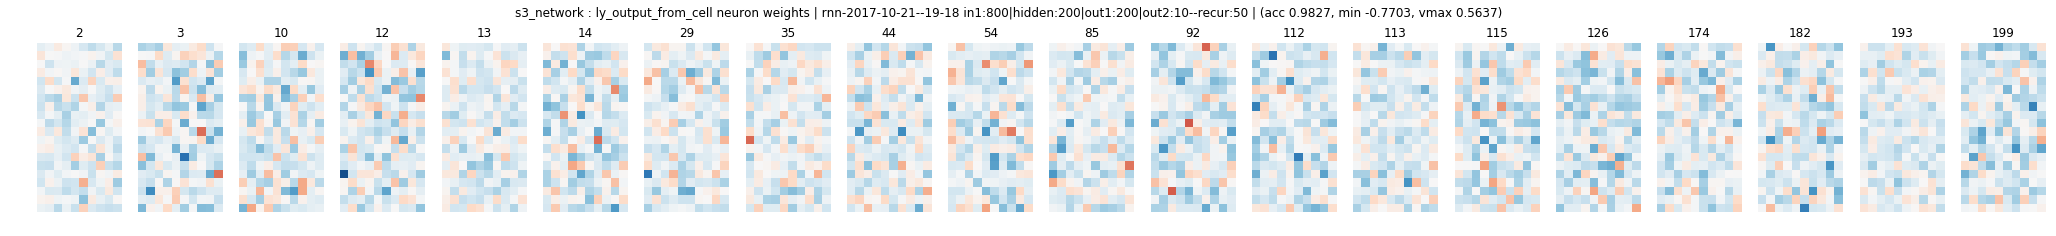

In [57]:
plot_layer(s5_seq_7_models_row2[2], 'ly_output_from_cell', col_selector=None, img_shape=(20,10), no_plots=20, ncols=20, nrows=1,
           col_size=1.8, row_size=3.5)

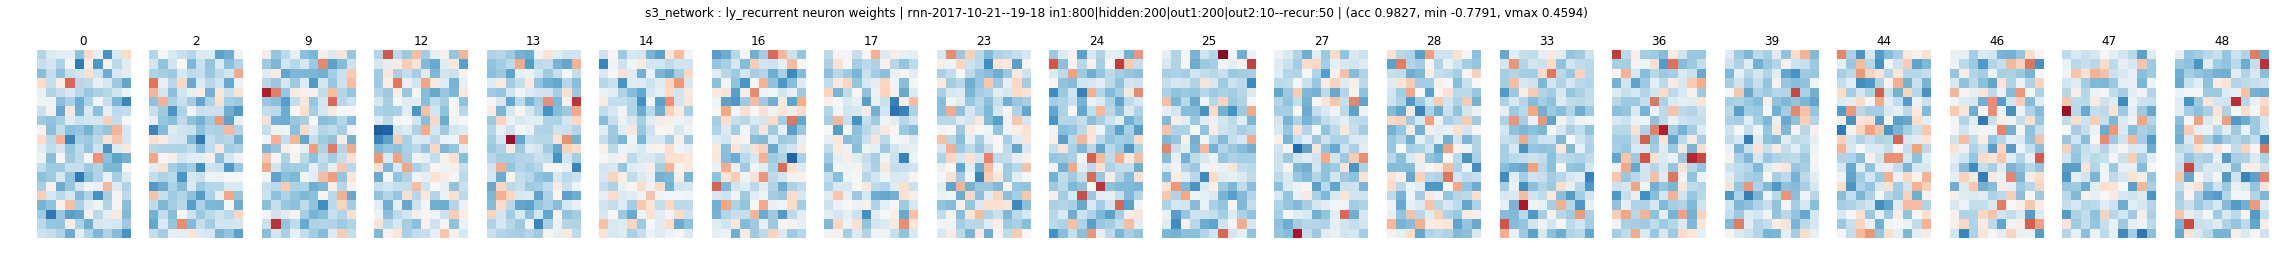

In [58]:
plot_layer(s5_seq_7_models_row2[2], 'ly_recurrent', col_selector=None, img_shape=(20,10), no_plots=20, ncols=20, nrows=1,
           col_size=2, row_size=4)

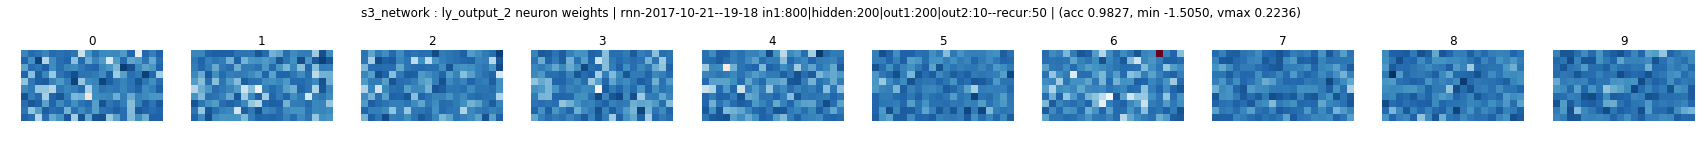

In [59]:
plot_layer(s5_seq_7_models_row2[2], 'ly_output_2', col_selector=None, img_shape=(10,20), no_plots=10, ncols=10, nrows=1,
           col_size=3, row_size=2.3)

## Investigate LWR Implemenation

### Meeting note
- AdamOptimizer gives much better heatmap for s3 network
- reduce *keep_prob* give better heatmap, especially for s3 network (Seq-1, 28 cols feed )
    - also the first layer units seem to learn some features from data.
- reduce *recurr* units force first layer to learn feature from data.
- reduce *recurr* units give better relevance heatmap?
    - should not be too low as relevance will hardly flow back
    - reduce horizontal line?
- do *recurr* and *dropout* play important role for relevance heatmap?

- we should keep network tight, meaning that too large network leading to improper learning of early representation layers
and affect relevance heatmaps 

### Seq length = 1 ( 28 cols feed )

In [60]:
x_from_tutorial, y_from_tutorial = utils.getMNISTsample(N=12,path='../data/mnist',seed=1234)
x_from_tutorial = x_from_tutorial.reshape(-1,28,28)

In [130]:
def plot_digits(m, data):
    total = data.shape[0]
    plt.figure(figsize=(20,3))
    
    if m is not None:
        preds, heatmaps = m.lwr(data, debug=False)
    for i in range(total):
        plt.subplot(1,12,i+1)
        if m is not None:
            pred, heatmap = preds[i], heatmaps[i,:,:]
            plt.title('Pred %d' % pred)
        else:
            heatmap = data[i,:]
            
        plt.imshow(heatmap, cmap="Reds")
        plt.xticks([])
        plt.yticks([])
        
    if m is not None:
        plt.suptitle('Heatmaps from %s:%s\n%s\n(opt %s, acc %.4f, keep_prob %.2f)' % (m._.architecture_name,
                                                                      m._.architecture,
                                                                      m._.experiment_name,
                                                                      m._.optimizer,
                                                                      m._.accuracy,
                                                                      m._.keep_prob
                                                                     ))

def plot_models(models):
    
    plot_digits(None, x_from_tutorial)
    
    for m in models:
        m = model_provider.load(m)
        plot_digits(m, x_from_tutorial)
        
    plt.show()

#### S2 Network

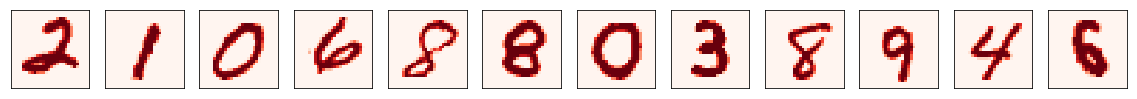

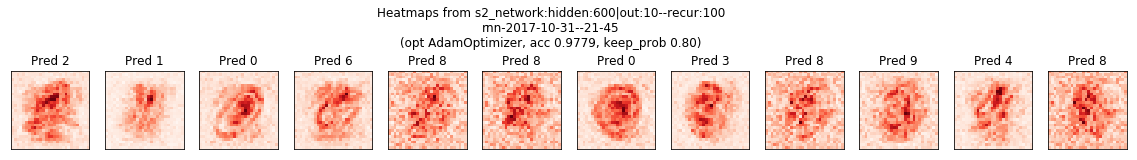

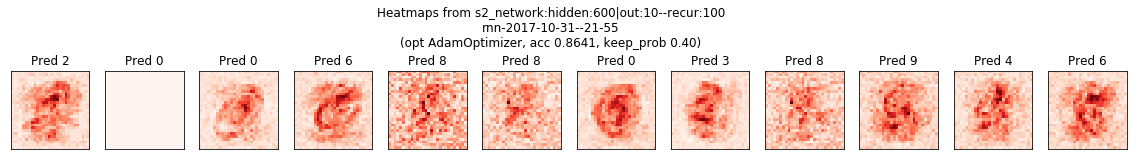

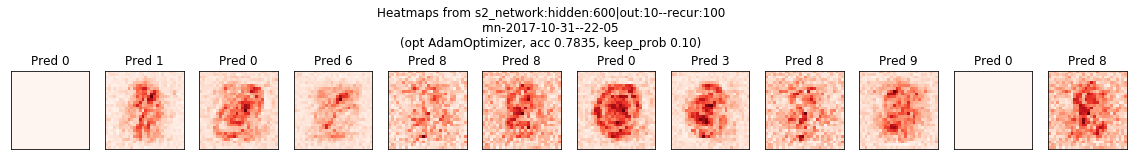

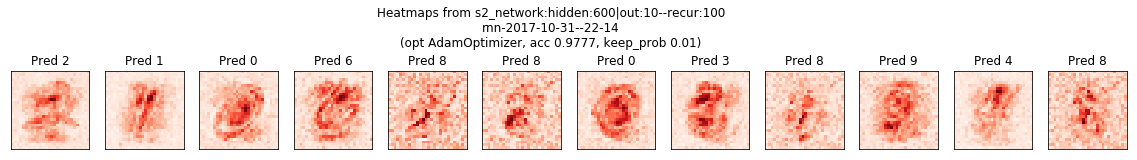

In [133]:
s2_models_adam = [
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--21-45',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--21-55',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--22-05',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--22-14'
]

plot_models(s2_models_adam)

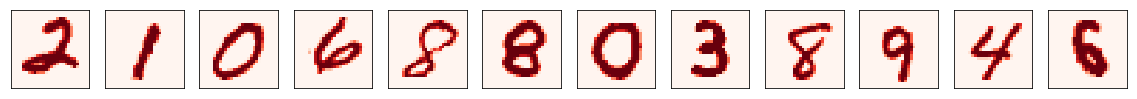

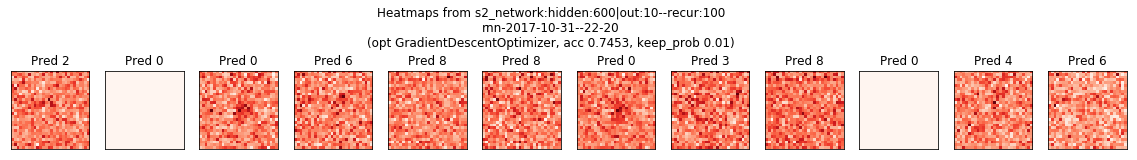

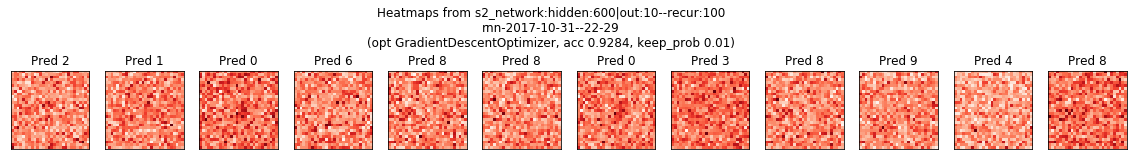

In [134]:
s2_models_sgd = [
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--22-20',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--22-29'
]

plot_models(s2_models_sgd)

#### S3 Network

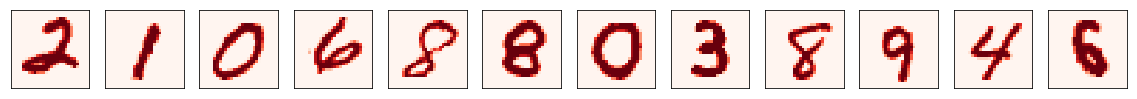

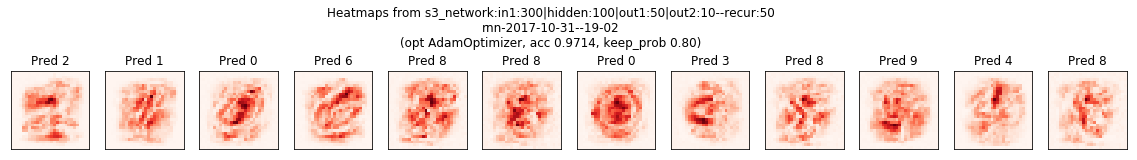

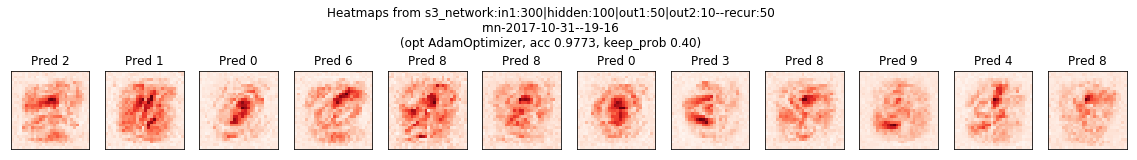

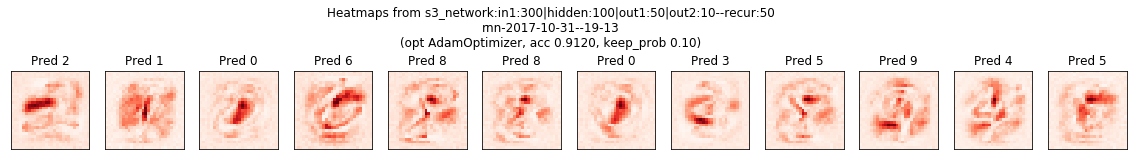

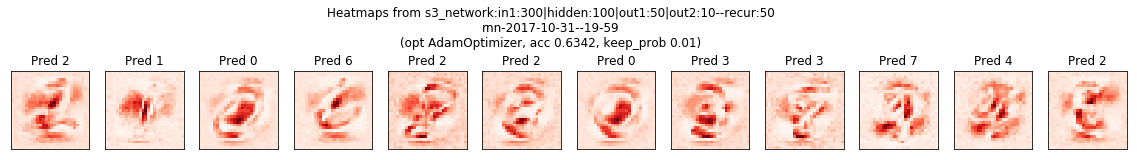

In [135]:
# Adam Optimizer    
s3_models_adam = [
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--19-02',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--19-16',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--19-13',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--19-59',
]

plot_models(s3_models_adam)

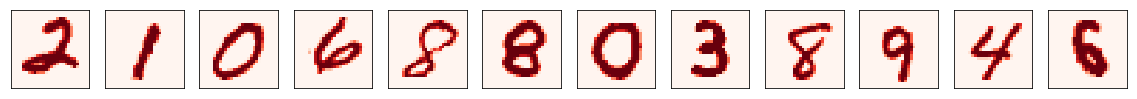

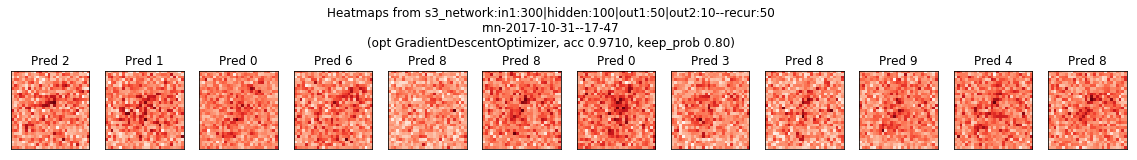

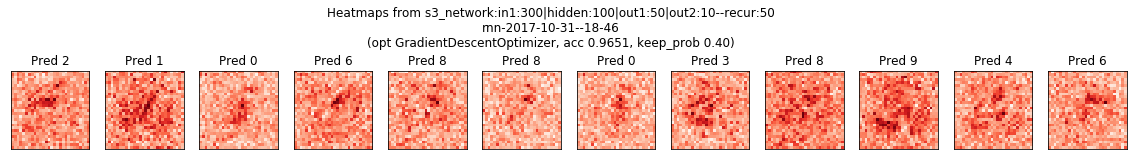

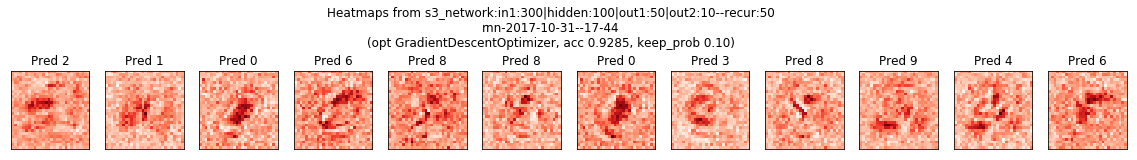

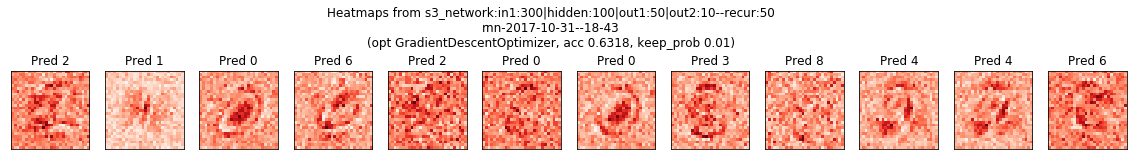

In [137]:
s3_models_sgd = [
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--17-47',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--18-46',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--17-44',
    '../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--18-43'
]

plot_models(s3_models_sgd)

##### Visualize 1st layer

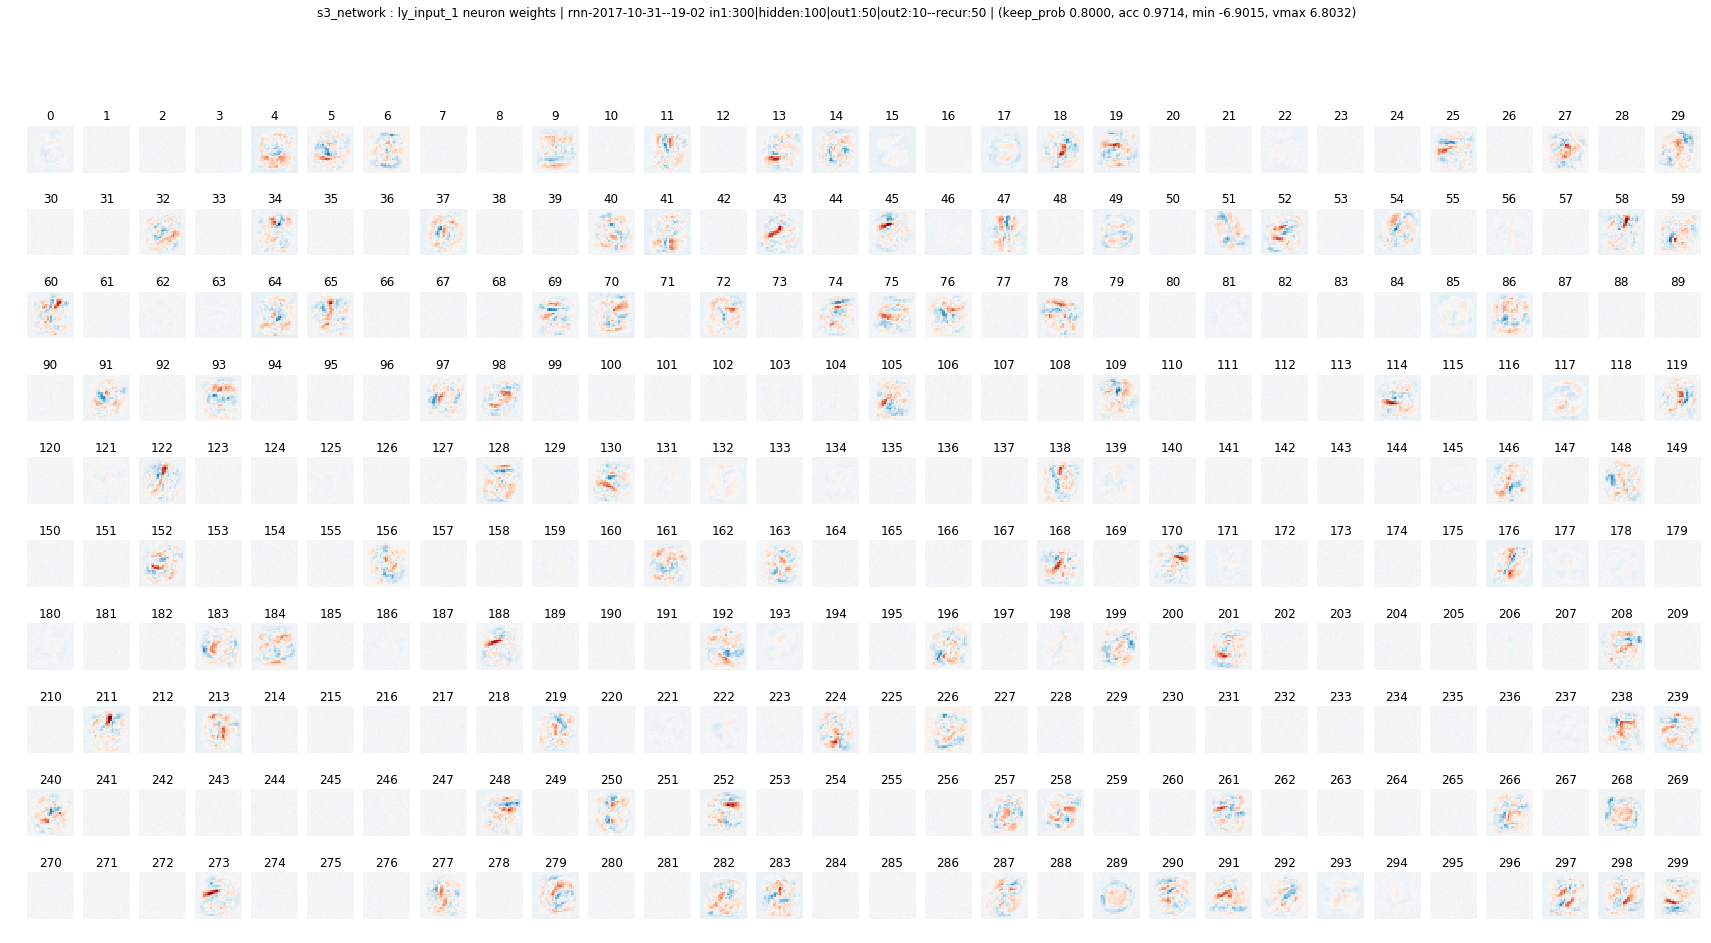

In [250]:
plot_layer('../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--19-02', 'ly_input_1',
           col_selector=None, img_shape=(28,28),
           no_plots=300, ncols=30, nrows=10,
           col_size=1, row_size=1.5, normalized=True)

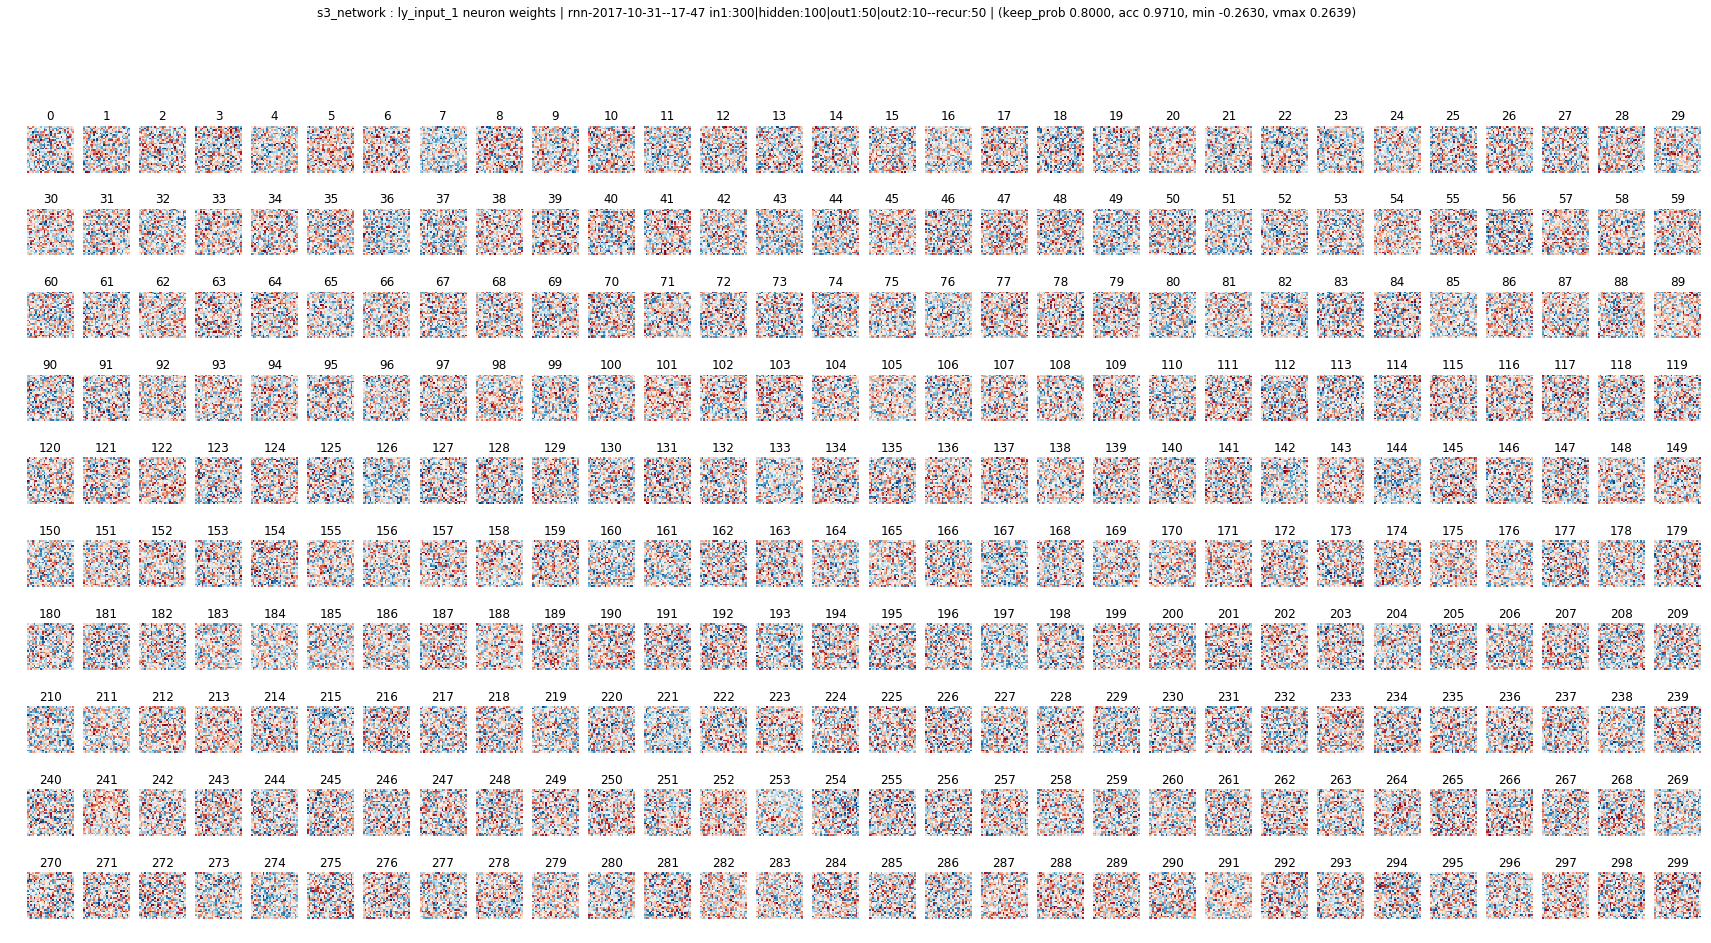

In [220]:
plot_layer('../experiment-results/sprint-5-seq-length-1/rnn-2017-10-31--17-47', 'ly_input_1',
           col_selector=None, img_shape=(28,28),
           no_plots=300, ncols=30, nrows=10,
           col_size=1, row_size=1.5, normalized=False)

### Seq length = 2 ( 14 cols )

In [260]:
s3_seq2_models = [
    '../experiment-results/sprint-5-seq-2-recur-effect/rnn-2017-11-02--00-49',
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--21-12',
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--21-22', # same as rnn-2017-11-02--21-12 but more epoch
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--22-11',
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--22-38',
    
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--20-49',
    
    '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--22-30',
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--22-58',
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--23-11',
#     '../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--23-51',
]

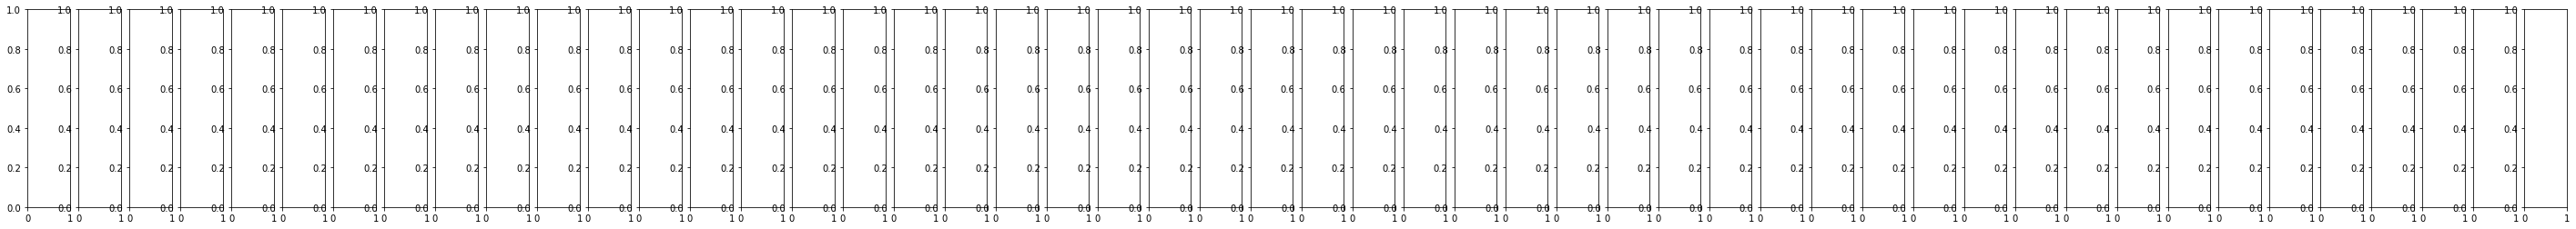

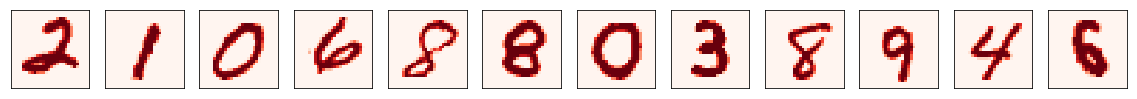

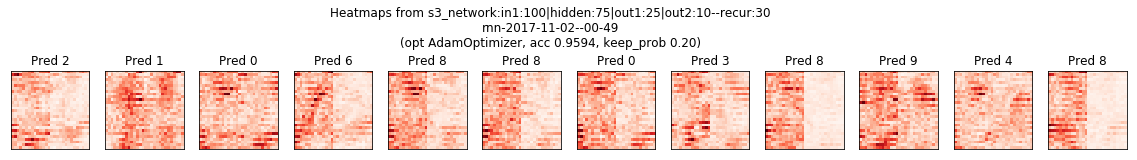

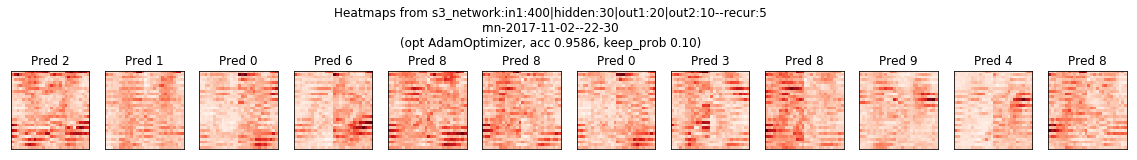

In [261]:
plot_models(s3_seq2_models)

#### Impact of recurrent layer to representation layer

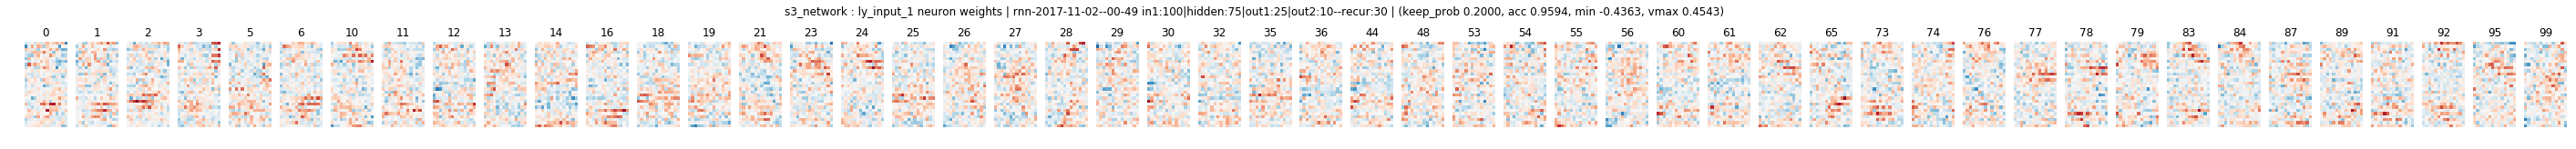

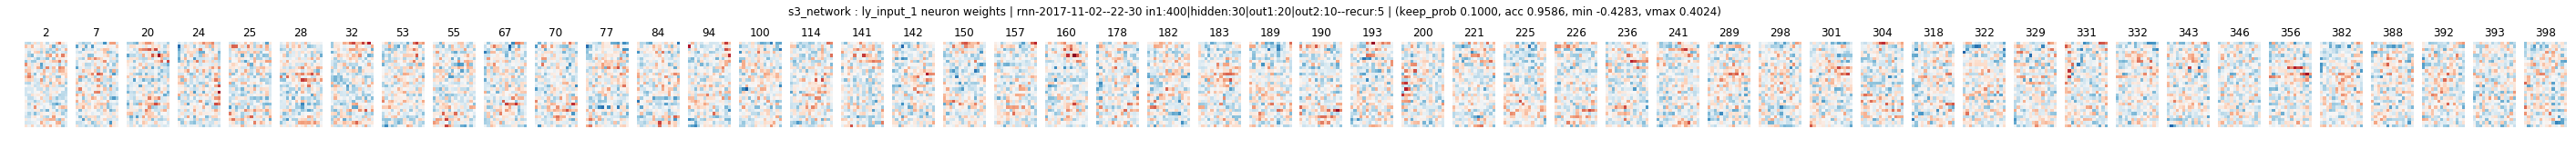

In [262]:
def plot_layer_from_models(models, layer, ncol=50, nrow=1, img_shape=(28,14), row_size=2.5):
    for m in models:
        plot_layer(m, layer, col_selector=None, img_shape=img_shape, no_plots=ncol*nrow, ncols=ncol, nrows=nrow,
               col_size=1, row_size=row_size)
    
plot_layer_from_models(s3_seq2_models, 'ly_input_1', ncol=50, nrow=1)

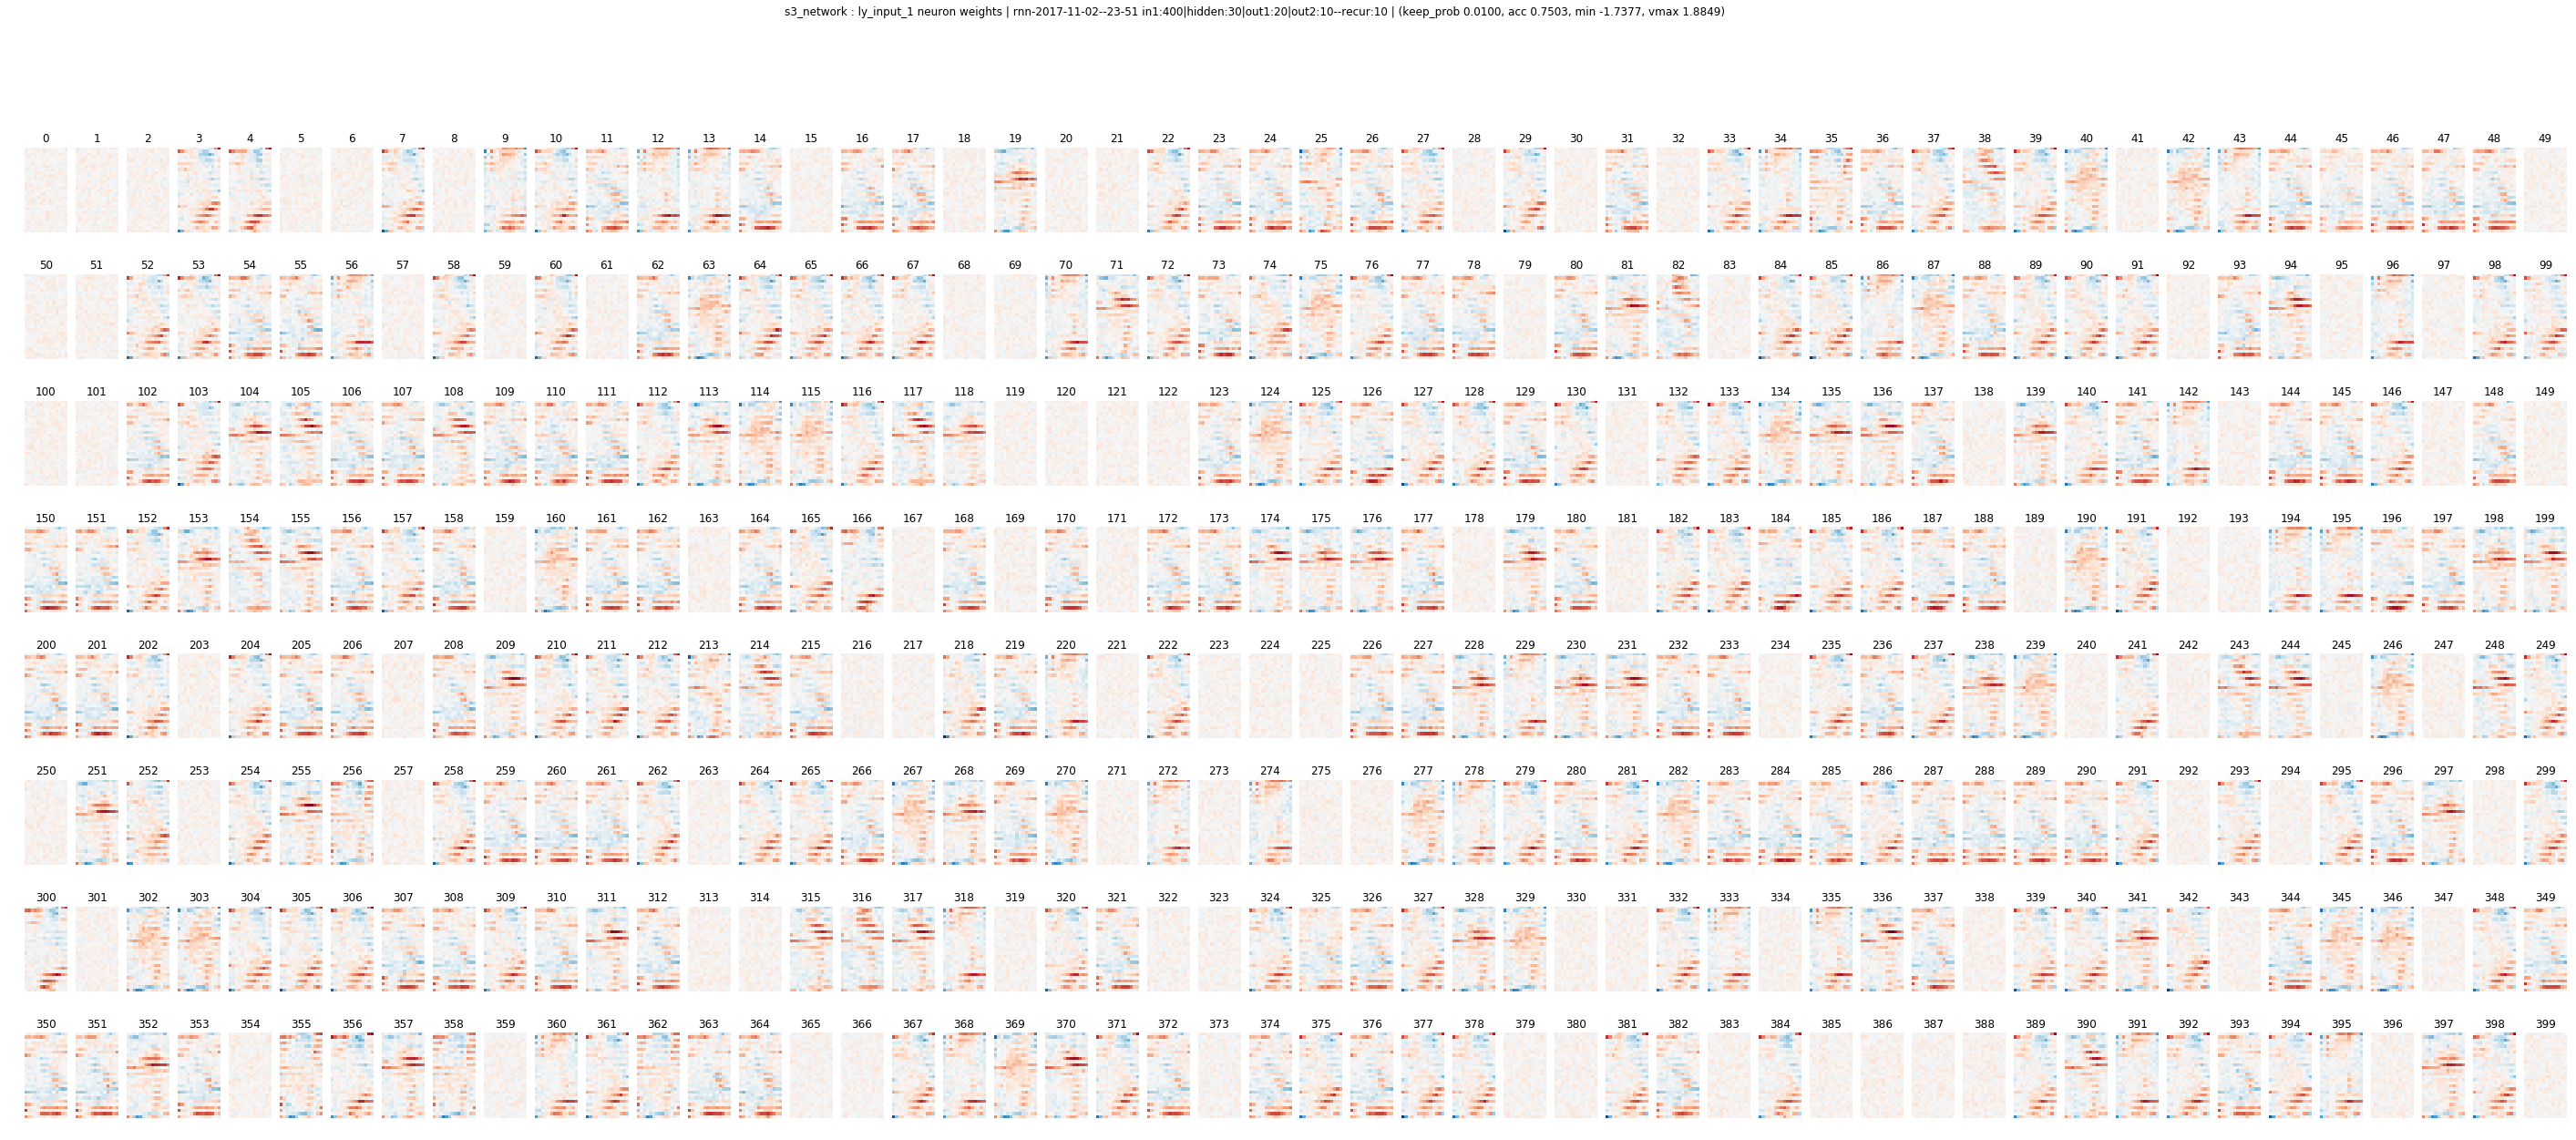

In [194]:
plot_layer('../experiment-results/sprint-5-seq-length-2/rnn-2017-11-02--23-51', 'ly_input_1', col_selector=None, img_shape=(28,14),
           no_plots=50*8, ncols=50, nrows=8, col_size=1, row_size=2.5)

### Seq length = 4 ( 7 cols feed )

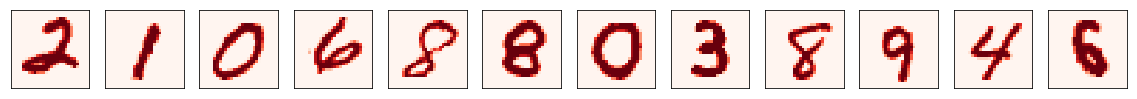

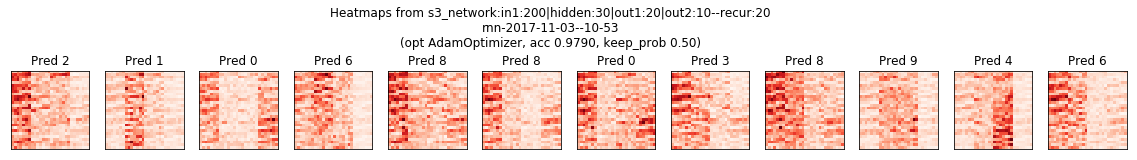

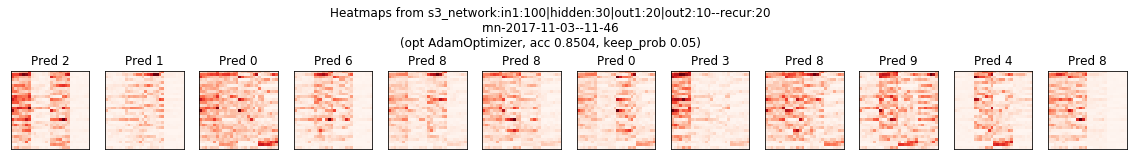

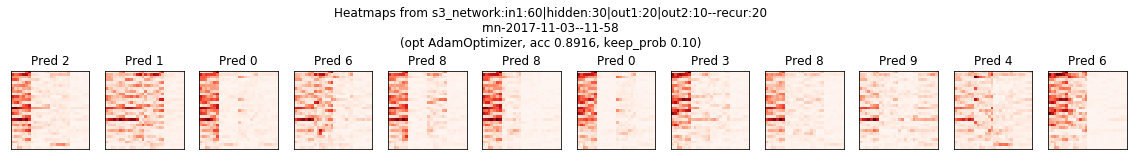

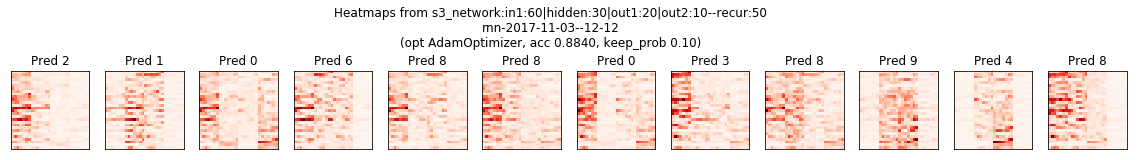

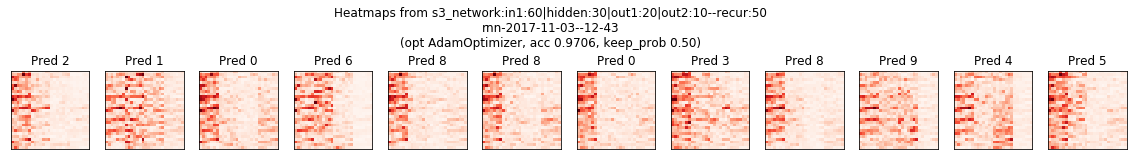

In [273]:
s3_seq4_models = [
    '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--10-53',
    '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--11-46',
    '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--11-58',
    '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--12-12',
    '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--12-43',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--12-54',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--13-17',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--16-06',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--04-15',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--03-48',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--11-15',
#     '../experiment-results/sprint-5-seq-4/rnn-2017-11-03--11-29',
]

plot_models(s3_seq4_models)

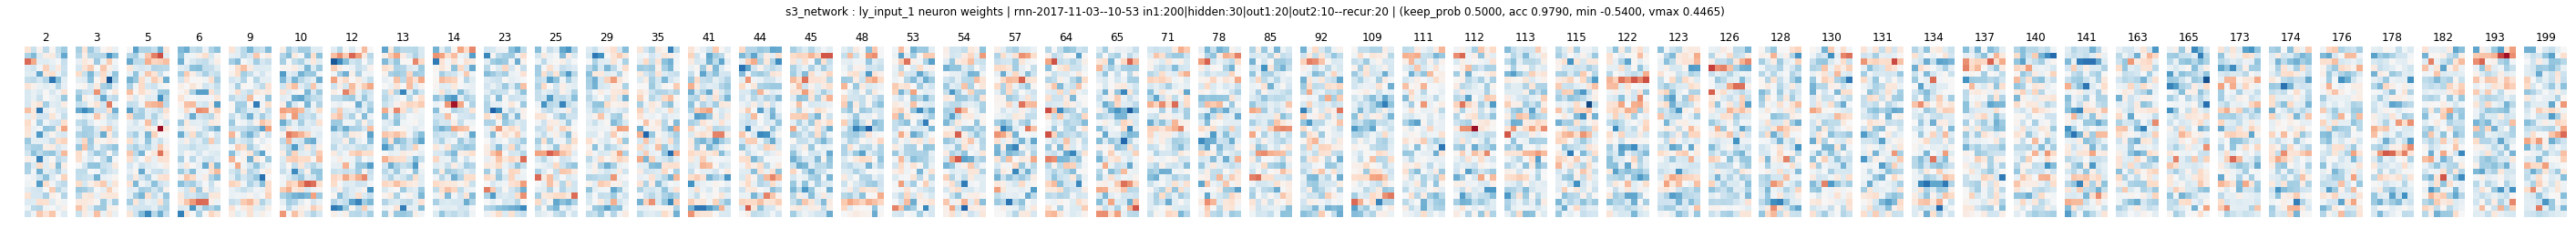

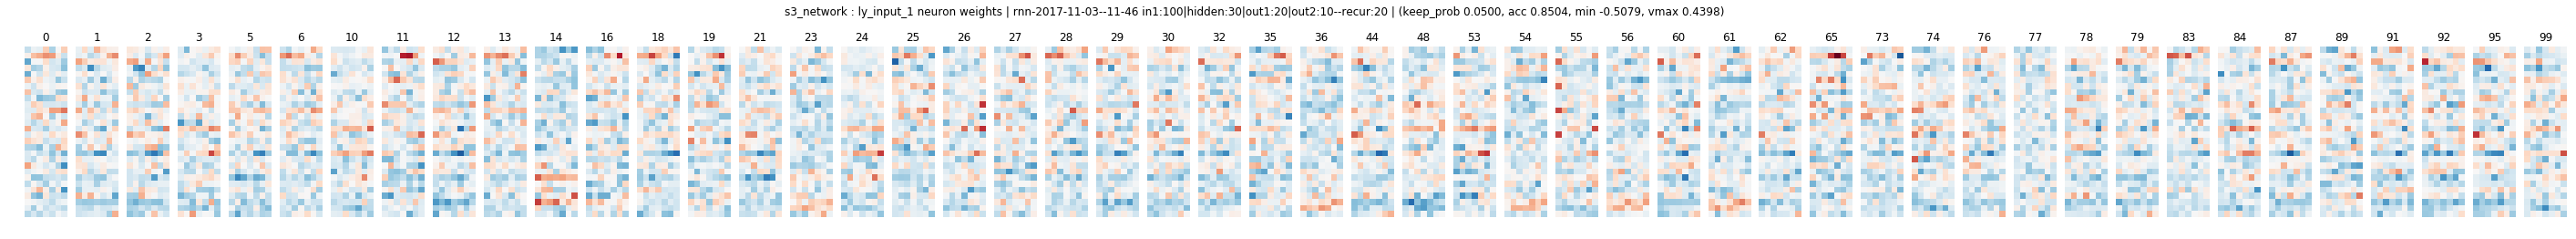

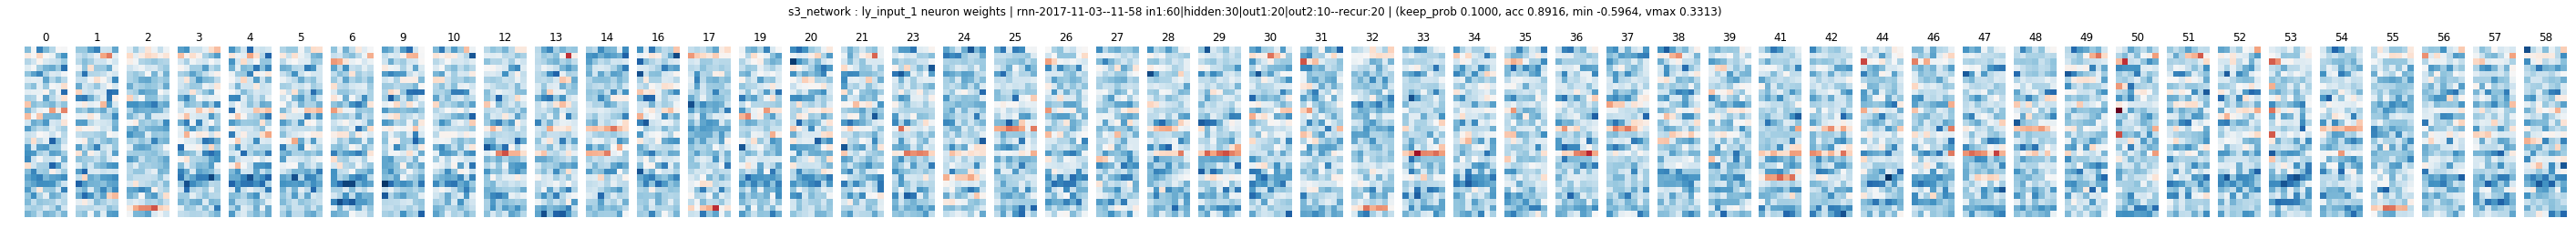

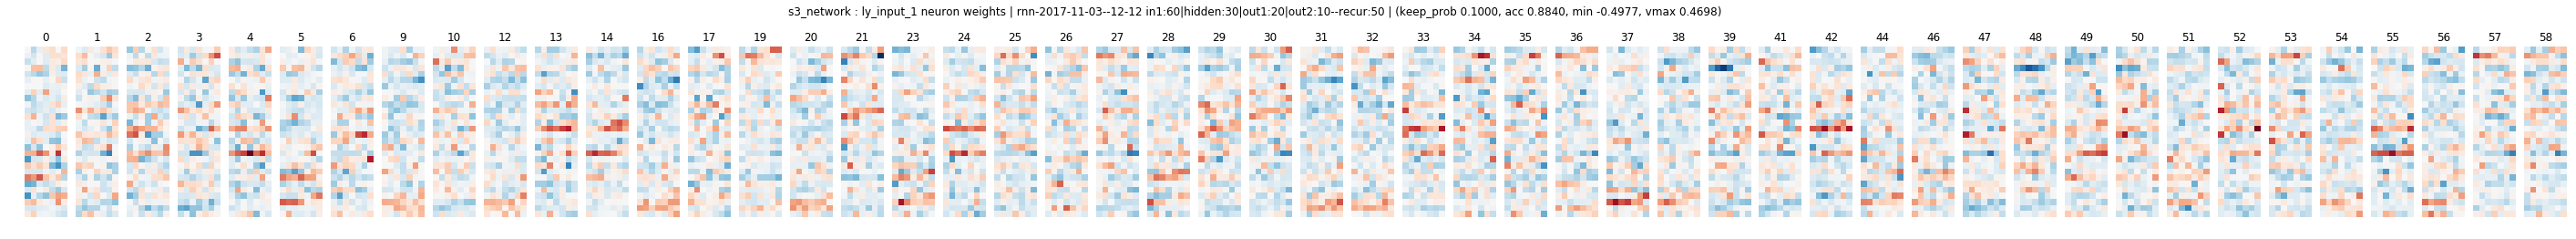

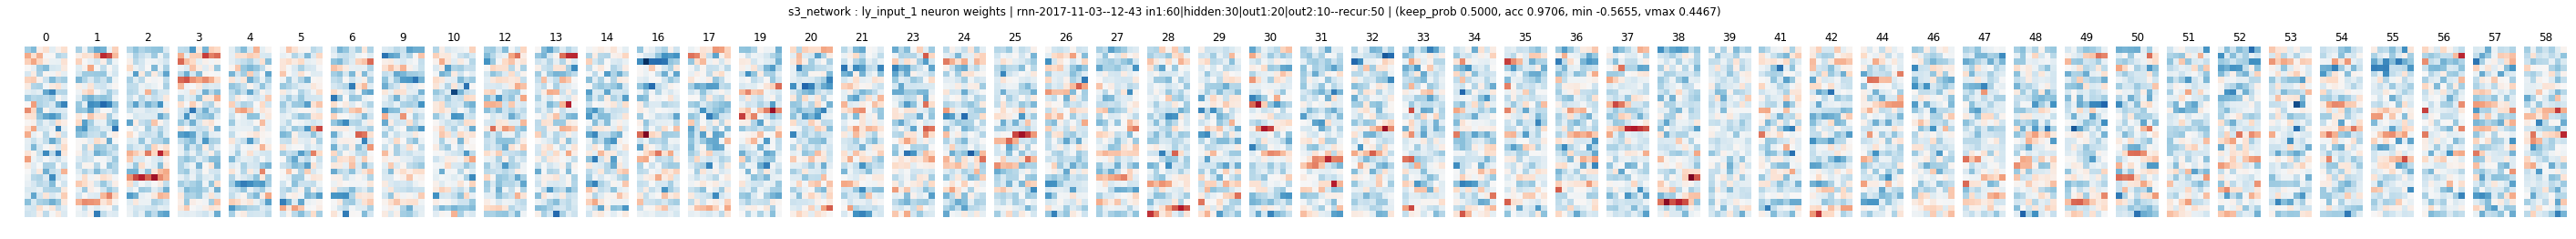

In [274]:
plot_layer_from_models(s3_seq4_models, 'ly_input_1', img_shape=(28,7), row_size=4)